<a href="https://colab.research.google.com/github/ujjwalbb30/DATA_602_Twitter_Sentiment_Analysis_Stock_Market_Prediction/blob/main/python_notebooks/Step_4_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis testing**

## Now that we have all the desired dataframes, we will merge these dataframes with stock market data and find the correlation values and p-value between sentiment analysis values and stock market values.

In [ ]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import spearmanr

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# importing the stock market dataset
company_stock_data = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/CompanyValues.csv')
display(company_stock_data)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0              AAPL  2020-05-29       317.94  ...      319.25      321.15   316.4700
1              AAPL  2020-05-28       318.25  ...      316.77      323.44   315.6300
2              AAPL  2020-05-27       318.11  ...      316.14      318.71   313.0900
3              AAPL  2020-05-26       316.73  ...      323.50      324.24   316.5000
4              AAPL  2020-05-22       318.89  ...      315.77      319.23   315.3500
...             ...         ...          ...  ...         ...         ...        ...
17523          TSLA  2019-12-21       405.59  ...      410.29      413.00   400.1850
17524          TSLA  2019-12-22       405.59  ...      410.29      413.00   400.1850
17525          TSLA  2019-12-25       425.25  ...      418.36      425.47   412.6875
17526          TSLA  2019-12-28       430.38  ...      435.00      435.31   426.1100
17527          TSLA  2019-12-29       430.38  ...      435.00      435.31   426.1100

[17528 rows x 7 columns]

## **For Apple**

In [ ]:
# filtering the dataset to get the stock market data of apple (AAPL)

apple_sm = company_stock_data[company_stock_data['ticker_symbol']=='AAPL']

# sorting the data and reseting the index
apple_sm = apple_sm.sort_values(by='day_date')
apple_sm.reset_index(drop=True,inplace=True)

display(apple_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0             AAPL  2010-06-01      37.2614  ...     37.0986     37.9914    36.9943
1             AAPL  2010-06-02      37.7071  ...     37.7914     37.8286    37.1907
2             AAPL  2010-06-03      37.5886  ...     37.8828     37.9357    37.2014
3             AAPL  2010-06-04      36.5664  ...     36.8871     37.4143    36.3757
4             AAPL  2010-06-07      35.8486  ...     36.8986     37.0214    35.7928
...            ...         ...          ...  ...         ...         ...        ...
3080          AAPL  2020-05-22     318.8900  ...    315.7700    319.2300   315.3500
3081          AAPL  2020-05-26     316.7300  ...    323.5000    324.2400   316.5000
3082          AAPL  2020-05-27     318.1100  ...    316.1400    318.7100   313.0900
3083          AAPL  2020-05-28     318.2500  ...    316.7700    323.4400   315.6300
3084          AAPL  2020-05-29     317.9400  ...    319.2500    321.1500   316.4700

[3085 rows x 7 columns]

In [ ]:
# checking info of the dataset
apple_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3085 non-null   object 
 1   day_date       3085 non-null   object 
 2   close_value    3085 non-null   float64
 3   volume         3085 non-null   int64  
 4   open_value     3085 non-null   float64
 5   high_value     3085 non-null   float64
 6   low_value      3085 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 168.8+ KB


In [ ]:
# converting the 'day_date' column to datetime format
apple_sm['date'] = pd.to_datetime(apple_sm['day_date'])
apple_sm.drop(columns=['day_date'],inplace=True)
display(apple_sm)
print(apple_sm.info())

ticker_symbol  close_value     volume  ...  high_value  low_value       date
0             AAPL      37.2614  218455576  ...     37.9914    36.9943 2010-06-01
1             AAPL      37.7071  171594061  ...     37.8286    37.1907 2010-06-02
2             AAPL      37.5886  162341809  ...     37.9357    37.2014 2010-06-03
3             AAPL      36.5664  189045767  ...     37.4143    36.3757 2010-06-04
4             AAPL      35.8486  221253336  ...     37.0214    35.7928 2010-06-07
...            ...          ...        ...  ...         ...        ...        ...
3080          AAPL     318.8900   20450750  ...    319.2300   315.3500 2020-05-22
3081          AAPL     316.7300   31380450  ...    324.2400   316.5000 2020-05-26
3082          AAPL     318.1100   28236270  ...    318.7100   313.0900 2020-05-27
3083          AAPL     318.2500   33449100  ...    323.4400   315.6300 2020-05-28
3084          AAPL     317.9400   38399530  ...    321.1500   316.4700 2020-05-29

[3085 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3085 non-null   object        
 1   close_value    3085 non-null   float64       
 2   volume         3085 non-null   int64         
 3   open_value     3085 non-null   float64       
 4   high_value     3085 non-null   float64       
 5   low_value      3085 non-null   float64       
 6   date           3085 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 168.8+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
apple_sm_same = apple_sm.loc[(apple_sm['date']>="2015-01-01") & (apple_sm['date']<="2020-01-01")]

# viewing the dataset
display(apple_sm_same)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1156          AAPL       110.38  41304780  ...      113.13     110.21 2015-01-01
1157          AAPL       109.33  53143770  ...      111.44     107.35 2015-01-02
1158          AAPL       109.33  53143770  ...      111.44     107.35 2015-01-03
1159          AAPL       109.33  53143770  ...      111.44     107.35 2015-01-04
1160          AAPL       106.25  64210880  ...      108.65     105.41 2015-01-05
...            ...          ...       ...  ...         ...        ...        ...
2977          AAPL       289.80  36592940  ...      293.97     288.12 2019-12-27
2978          AAPL       289.80  36592940  ...      293.97     288.12 2019-12-28
2979          AAPL       289.80  36592940  ...      293.97     288.12 2019-12-29
2980          AAPL       291.52  36059610  ...      292.69     285.22 2019-12-30
2981          AAPL       293.65  25247630  ...      293.68     289.52 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
apple_sm_3d = apple_sm.loc[(apple_sm['date']>="2015-01-03") & (apple_sm['date']<="2020-01-01")]

# viewing the dataset
display(apple_sm_3d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1158          AAPL       109.33  53143770  ...      111.44    107.350 2015-01-03
1159          AAPL       109.33  53143770  ...      111.44    107.350 2015-01-04
1160          AAPL       106.25  64210880  ...      108.65    105.410 2015-01-05
1161          AAPL       106.26  65682250  ...      107.43    104.630 2015-01-06
1162          AAPL       107.75  39983350  ...      108.20    106.695 2015-01-07
...            ...          ...       ...  ...         ...        ...        ...
2977          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-27
2978          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-28
2979          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-29
2980          AAPL       291.52  36059610  ...      292.69    285.220 2019-12-30
2981          AAPL       293.65  25247630  ...      293.68    289.520 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
apple_sm_7d = apple_sm.loc[(apple_sm['date']>="2015-01-07") & (apple_sm['date']<="2020-01-01")]

# viewing the dataset
display(apple_sm_7d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1162          AAPL       107.75  39983350  ...      108.20    106.695 2015-01-07
1163          AAPL       111.89  59168760  ...      112.15    108.700 2015-01-08
1164          AAPL       112.01  53645730  ...      113.25    110.210 2015-01-09
1165          AAPL       112.01  53645730  ...      113.25    110.210 2015-01-10
1166          AAPL       112.01  53645730  ...      113.25    110.210 2015-01-11
...            ...          ...       ...  ...         ...        ...        ...
2977          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-27
2978          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-28
2979          AAPL       289.80  36592940  ...      293.97    288.120 2019-12-29
2980          AAPL       291.52  36059610  ...      292.69    285.220 2019-12-30
2981          AAPL       293.65  25247630  ...      293.68    289.520 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
apple_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/comb_tweets_apple1_snt.csv')
apple_tweets_same = apple_tweets_same.drop(columns=['Unnamed: 0'])
apple_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
apple_tweets_same['date'] = pd.to_datetime(apple_tweets_same['date'])

apple_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/comb_tweets_appleprev_snt.csv')
apple_tweets_prev = apple_tweets_prev.drop(columns=['Unnamed: 0'])
apple_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
apple_tweets_prev['date'] = pd.to_datetime(apple_tweets_prev['date'])

apple_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/comb_tweets_apple3d_snt.csv')
apple_tweets_3d = apple_tweets_3d.drop(columns=['Unnamed: 0'])
apple_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
apple_tweets_3d['date'] = pd.to_datetime(apple_tweets_3d['date'])

# viewing the dataframes
display(apple_tweets_same)
display(apple_tweets_prev)
display(apple_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1821 2019-12-28  ...  positive
1822 2019-12-29  ...  positive
1823 2019-12-30  ...  positive
1824 2019-12-31  ...  positive
1825 2020-01-01  ...  positive

[1826 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
apple_sm_ts_same = pd.merge(apple_sm_same,apple_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(apple_sm_ts_same)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             AAPL       110.38  41304780  ...  0.156    0.9999   positive
1             AAPL       109.33  53143770  ...  0.120    0.9999   positive
2             AAPL       109.33  53143770  ...  0.181    1.0000   positive
3             AAPL       109.33  53143770  ...  0.193    1.0000   positive
4             AAPL       106.25  64210880  ...  0.167    1.0000   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          AAPL       289.80  36592940  ...  0.158    1.0000   positive
1822          AAPL       289.80  36592940  ...  0.136    0.9999   positive
1823          AAPL       289.80  36592940  ...  0.142    0.9999   positive
1824          AAPL       291.52  36059610  ...  0.173    1.0000   positive
1825          AAPL       293.65  25247630  ...  0.140    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(apple_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
apple_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
apple_sm_ts_same = apple_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',apple_sm_ts_same.columns)
display(apple_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          AAPL  ...    110.21      113.13
1    2015-01-02          AAPL  ...    107.35      111.44
2    2015-01-03          AAPL  ...    107.35      111.44
3    2015-01-04          AAPL  ...    107.35      111.44
4    2015-01-05          AAPL  ...    105.41      108.65
...         ...           ...  ...       ...         ...
1821 2019-12-27          AAPL  ...    288.12      293.97
1822 2019-12-28          AAPL  ...    288.12      293.97
1823 2019-12-29          AAPL  ...    288.12      293.97
1824 2019-12-30          AAPL  ...    285.22      292.69
1825 2019-12-31          AAPL  ...    289.52      293.68

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
apple_sm_ts_prev = pd.merge(apple_sm_same,apple_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(apple_sm_ts_prev)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             AAPL       110.38  41304780  ...  0.065    0.9354   positive
1             AAPL       109.33  53143770  ...  0.125    0.9998   positive
2             AAPL       109.33  53143770  ...  0.148    1.0000   positive
3             AAPL       109.33  53143770  ...  0.200    1.0000   positive
4             AAPL       106.25  64210880  ...  0.198    1.0000   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          AAPL       289.80  36592940  ...  0.155    1.0000   positive
1822          AAPL       289.80  36592940  ...  0.149    1.0000   positive
1823          AAPL       289.80  36592940  ...  0.163    0.9999   positive
1824          AAPL       291.52  36059610  ...  0.142    0.9999   positive
1825          AAPL       293.65  25247630  ...  0.169    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
apple_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
apple_sm_ts_prev = apple_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',apple_sm_ts_prev.columns)
display(apple_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          AAPL  ...    110.21      113.13
1    2015-01-02          AAPL  ...    107.35      111.44
2    2015-01-03          AAPL  ...    107.35      111.44
3    2015-01-04          AAPL  ...    107.35      111.44
4    2015-01-05          AAPL  ...    105.41      108.65
...         ...           ...  ...       ...         ...
1821 2019-12-27          AAPL  ...    288.12      293.97
1822 2019-12-28          AAPL  ...    288.12      293.97
1823 2019-12-29          AAPL  ...    288.12      293.97
1824 2019-12-30          AAPL  ...    285.22      292.69
1825 2019-12-31          AAPL  ...    289.52      293.68

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
apple_sm_ts_3d = pd.merge(apple_sm_3d,apple_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(apple_sm_ts_3d)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             AAPL       109.33  53143770  ...  0.154       1.0   positive
1             AAPL       109.33  53143770  ...  0.174       1.0   positive
2             AAPL       106.25  64210880  ...  0.180       1.0   positive
3             AAPL       106.26  65682250  ...  0.177       1.0   positive
4             AAPL       107.75  39983350  ...  0.174       1.0   positive
...            ...          ...       ...  ...    ...       ...        ...
1819          AAPL       289.80  36592940  ...  0.158       1.0   positive
1820          AAPL       289.80  36592940  ...  0.151       1.0   positive
1821          AAPL       289.80  36592940  ...  0.149       1.0   positive
1822          AAPL       291.52  36059610  ...  0.164       1.0   positive
1823          AAPL       293.65  25247630  ...  0.155       1.0   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
apple_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
apple_sm_ts_3d = apple_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',apple_sm_ts_3d.columns)
display(apple_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-03          AAPL  ...   107.350      111.44
1    2015-01-04          AAPL  ...   107.350      111.44
2    2015-01-05          AAPL  ...   105.410      108.65
3    2015-01-06          AAPL  ...   104.630      107.43
4    2015-01-07          AAPL  ...   106.695      108.20
...         ...           ...  ...       ...         ...
1819 2019-12-27          AAPL  ...   288.120      293.97
1820 2019-12-28          AAPL  ...   288.120      293.97
1821 2019-12-29          AAPL  ...   288.120      293.97
1822 2019-12-30          AAPL  ...   285.220      292.69
1823 2019-12-31          AAPL  ...   289.520      293.68

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

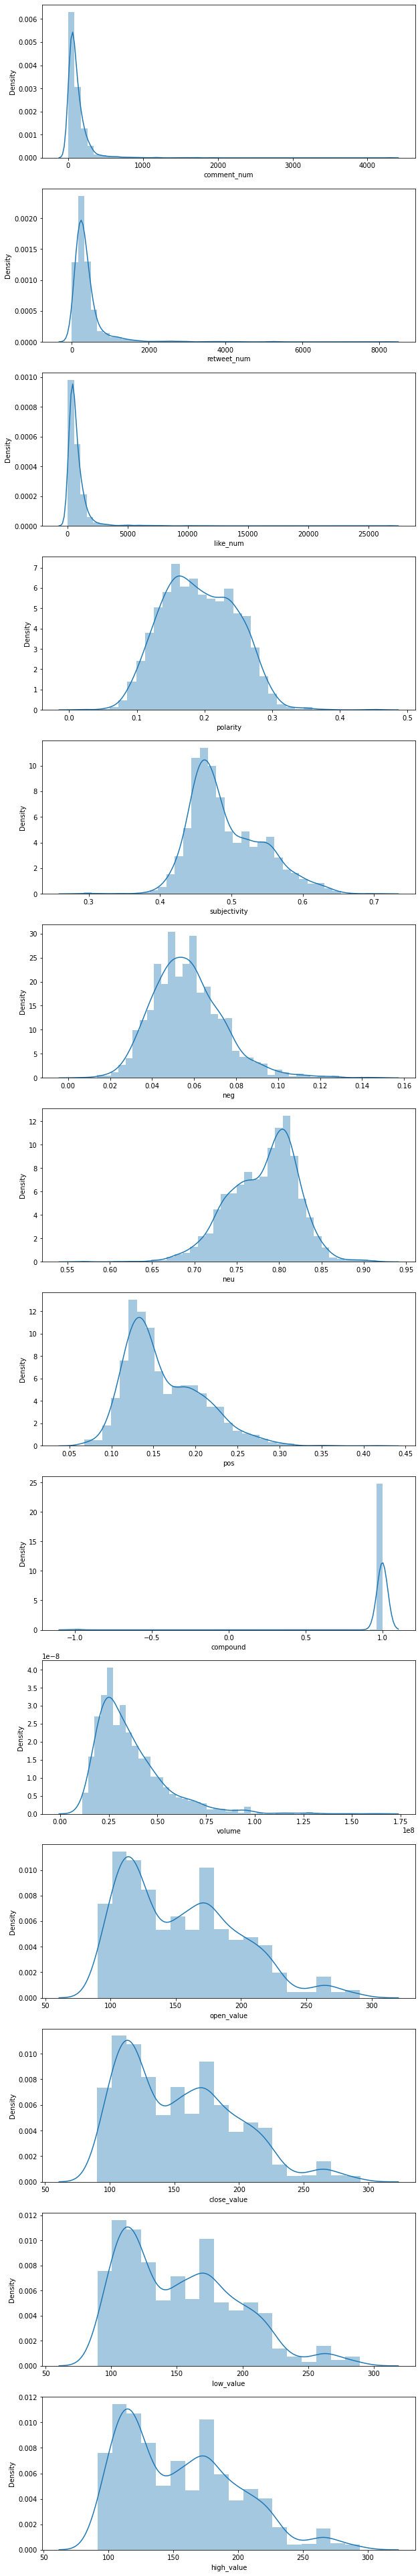

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(apple_sm_ts_same[col_int].columns):
    sns.distplot(apple_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

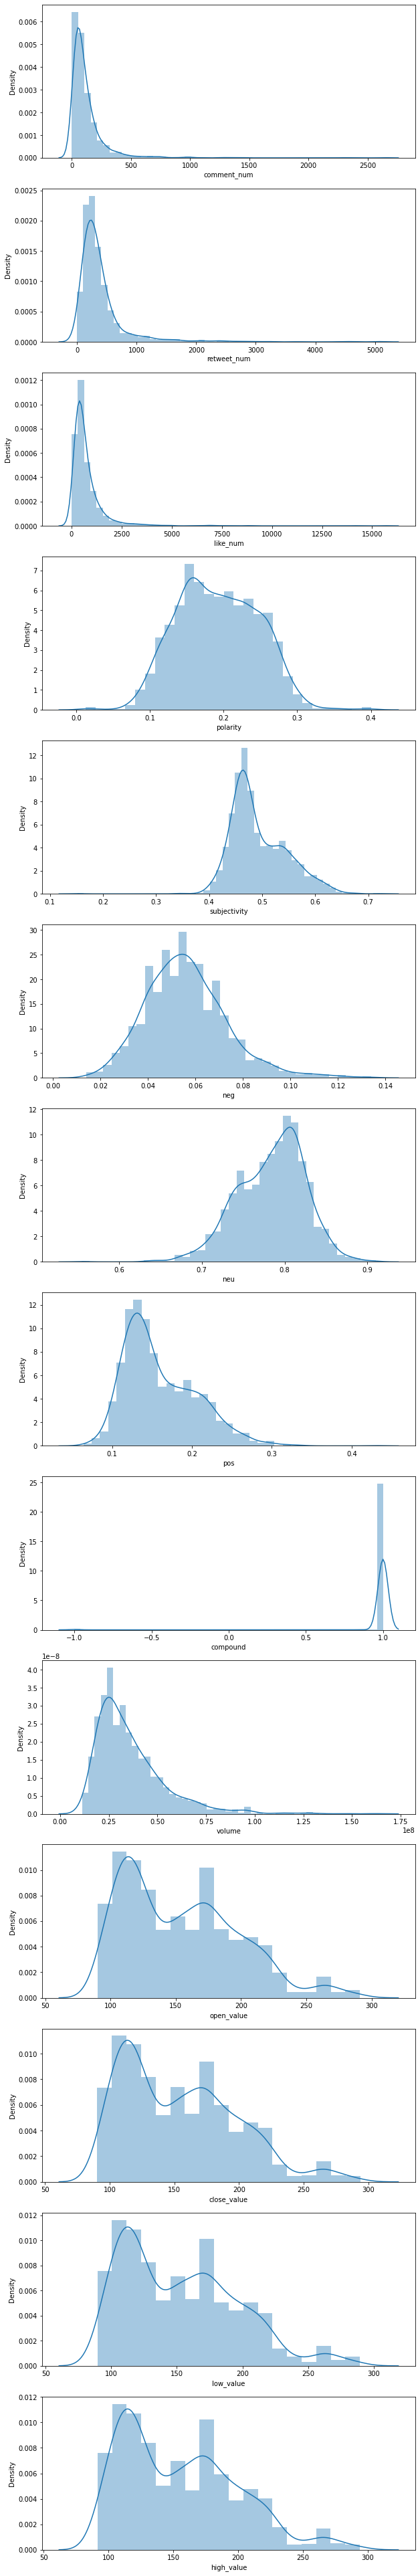

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(apple_sm_ts_prev[col_int].columns):
    sns.distplot(apple_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

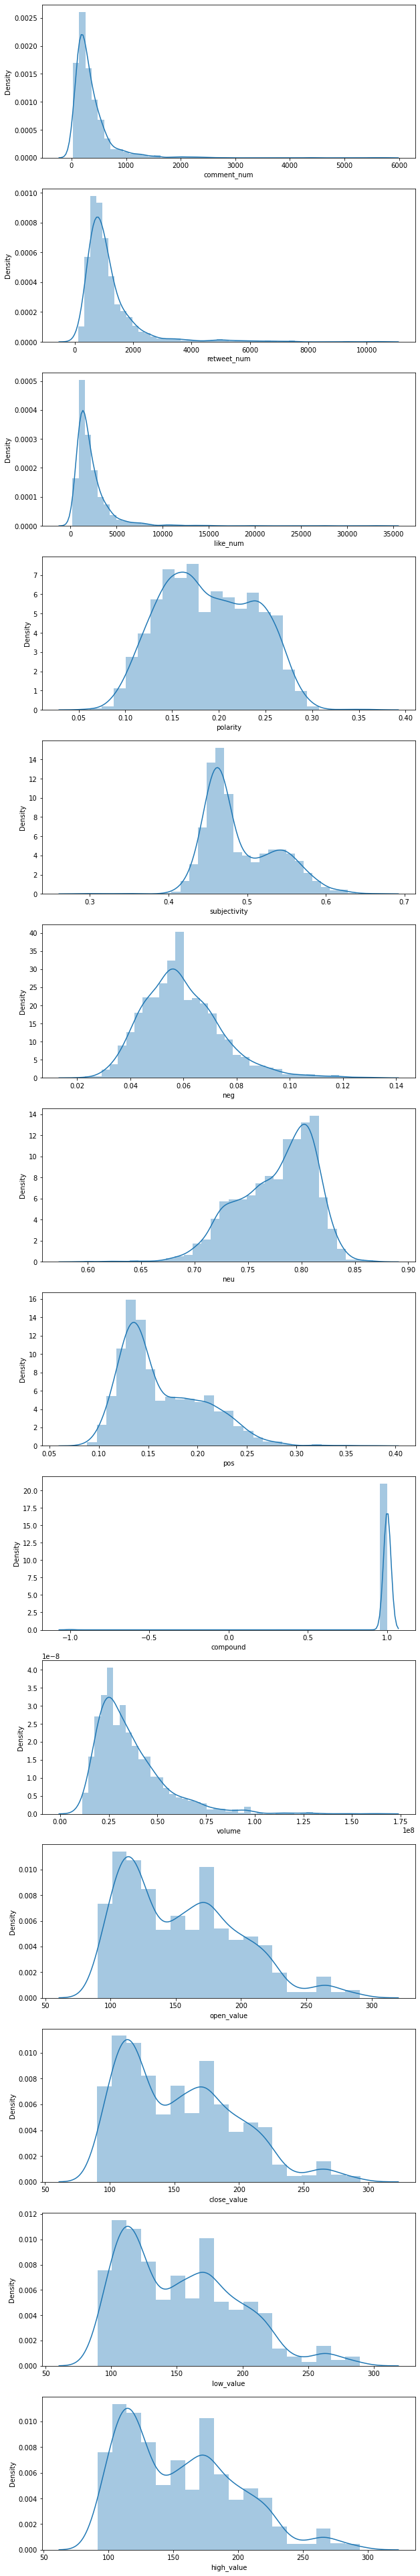

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(apple_sm_ts_3d[col_int].columns):
    sns.distplot(apple_sm_ts_3d[col_int][column],ax=axes[i])

### **Exporting the combined datasets**

In [ ]:
# same day
apple_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/apple_sm_ts_same.csv',index=False)

# previous day
apple_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/apple_sm_ts_prev.csv',index=False)

# last 3 days
apple_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Apple/apple_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = apple_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

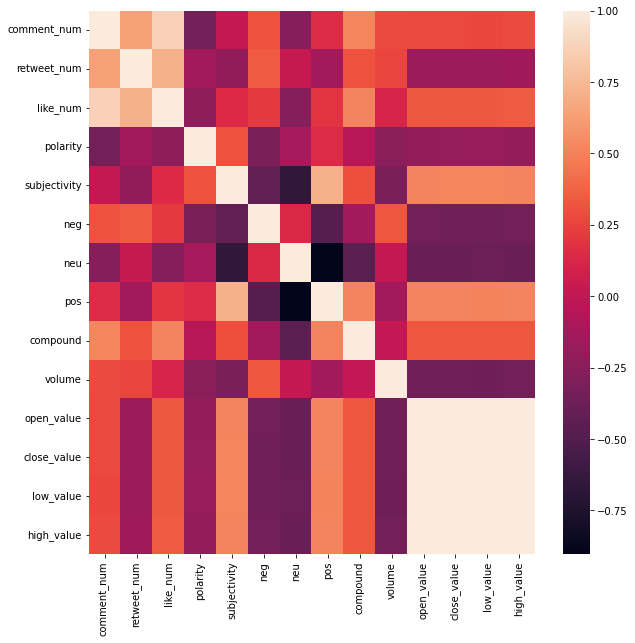

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(apple_sm_ts_same.corr(method='spearman'))

In [ ]:
# defining a function to calculate the p-values for all the columns in the dataframe
def calc_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues

In [ ]:
display(calc_pvalues(apple_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0        0  ...           0         0          0
subjectivity      0.3499           0        0  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0      0.2365        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = apple_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

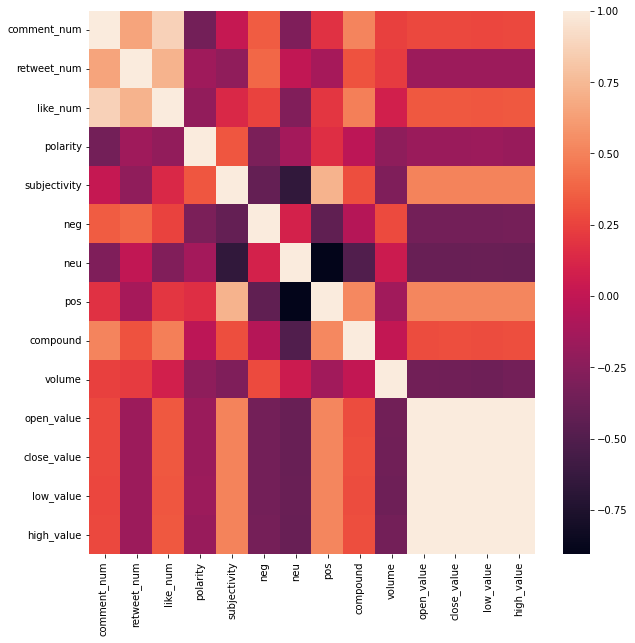

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(apple_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(apple_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0        0  ...           0         0          0
subjectivity      0.4069           0        0  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0      0.9356        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0   0.0006  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = apple_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

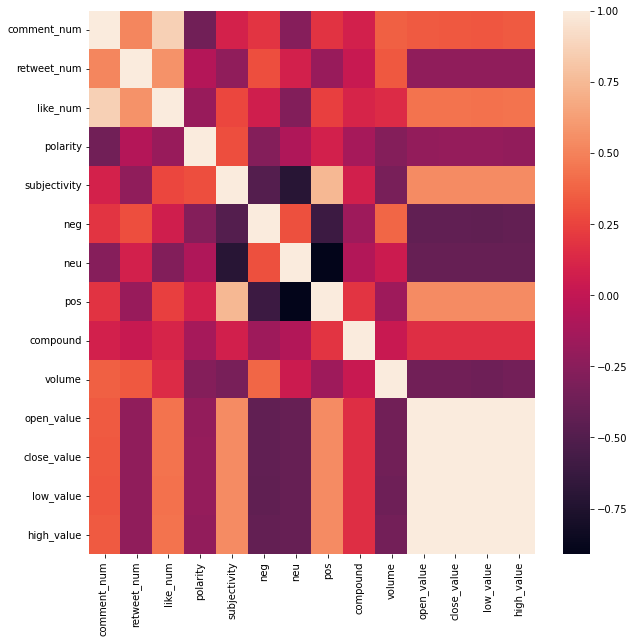

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(apple_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(apple_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.0043        0  ...           0         0          0
subjectivity      0.0001           0        0  ...           0         0          0
neg                    0           0   0.0019  ...           0         0          0
neu                    0      0.0001        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound          0.0002      0.3137        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

## **For Tesla**

In [ ]:
# filtering the dataset to get the stock market data of tesla (TSLA)

tesla_sm = company_stock_data[company_stock_data['ticker_symbol']=='TSLA']

# sorting the data and reseting the index
tesla_sm = tesla_sm.sort_values(by='day_date')
tesla_sm.reset_index(drop=True,inplace=True)

display(tesla_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0             TSLA  2010-06-29        23.89  ...      19.000     25.0000     17.540
1             TSLA  2010-06-30        23.83  ...      25.790     30.4192     23.300
2             TSLA  2010-07-01        21.96  ...      25.000     25.9200     20.270
3             TSLA  2010-07-02        19.20  ...      23.000     23.1000     18.710
4             TSLA  2010-07-06        16.11  ...      20.000     20.0000     15.830
...            ...         ...          ...  ...         ...         ...        ...
3060          TSLA  2020-05-22       816.88  ...     822.174    831.7800    812.000
3061          TSLA  2020-05-26       818.87  ...     834.500    834.6000    815.705
3062          TSLA  2020-05-27       820.23  ...     820.860    827.7100    785.000
3063          TSLA  2020-05-28       805.81  ...     813.510    824.7500    801.690
3064          TSLA  2020-05-29       835.00  ...     808.750    835.0000    804.210

[3065 rows x 7 columns]

In [ ]:
# checking info of the dataset
tesla_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3065 non-null   object 
 1   day_date       3065 non-null   object 
 2   close_value    3065 non-null   float64
 3   volume         3065 non-null   int64  
 4   open_value     3065 non-null   float64
 5   high_value     3065 non-null   float64
 6   low_value      3065 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 167.7+ KB


In [ ]:
# converting the 'day_date' column to datetime format
tesla_sm['date'] = pd.to_datetime(tesla_sm['day_date'])
tesla_sm.drop(columns=['day_date'],inplace=True)
display(tesla_sm)
print(tesla_sm.info())

ticker_symbol  close_value    volume  ...  high_value  low_value       date
0             TSLA        23.89  18751150  ...     25.0000     17.540 2010-06-29
1             TSLA        23.83  17165210  ...     30.4192     23.300 2010-06-30
2             TSLA        21.96   8216789  ...     25.9200     20.270 2010-07-01
3             TSLA        19.20   5135795  ...     23.1000     18.710 2010-07-02
4             TSLA        16.11   6858092  ...     20.0000     15.830 2010-07-06
...            ...          ...       ...  ...         ...        ...        ...
3060          TSLA       816.88   9987475  ...    831.7800    812.000 2020-05-22
3061          TSLA       818.87   8089736  ...    834.6000    815.705 2020-05-26
3062          TSLA       820.23  11549530  ...    827.7100    785.000 2020-05-27
3063          TSLA       805.81   7275774  ...    824.7500    801.690 2020-05-28
3064          TSLA       835.00  11812490  ...    835.0000    804.210 2020-05-29

[3065 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3065 non-null   object        
 1   close_value    3065 non-null   float64       
 2   volume         3065 non-null   int64         
 3   open_value     3065 non-null   float64       
 4   high_value     3065 non-null   float64       
 5   low_value      3065 non-null   float64       
 6   date           3065 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 167.7+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
tesla_sm_same = tesla_sm.loc[(tesla_sm['date']>="2015-01-01") & (tesla_sm['date']<="2020-01-01")]

# viewing the dataset
display(tesla_sm_same)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1136          TSLA       222.41   2392947  ...      225.68   222.2500 2015-01-01
1137          TSLA       219.31   4753239  ...      223.25   213.2600 2015-01-02
1138          TSLA       219.31   4753239  ...      223.25   213.2600 2015-01-03
1139          TSLA       219.31   4753239  ...      223.25   213.2600 2015-01-04
1140          TSLA       210.09   5355485  ...      216.50   207.1626 2015-01-05
...            ...          ...       ...  ...         ...        ...        ...
2957          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-27
2958          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-28
2959          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-29
2960          TSLA       414.70  12601270  ...      429.00   409.2589 2019-12-30
2961          TSLA       418.33  10292460  ...      421.29   402.0800 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
tesla_sm_3d = tesla_sm.loc[(tesla_sm['date']>="2015-01-03") & (tesla_sm['date']<="2020-01-01")]

# viewing the dataset
display(tesla_sm_3d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1138          TSLA       219.31   4753239  ...      223.25   213.2600 2015-01-03
1139          TSLA       219.31   4753239  ...      223.25   213.2600 2015-01-04
1140          TSLA       210.09   5355485  ...      216.50   207.1626 2015-01-05
1141          TSLA       211.28   6257651  ...      214.20   204.2100 2015-01-06
1142          TSLA       210.95   2965330  ...      214.78   209.7800 2015-01-07
...            ...          ...       ...  ...         ...        ...        ...
2957          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-27
2958          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-28
2959          TSLA       430.38   9956827  ...      435.31   426.1100 2019-12-29
2960          TSLA       414.70  12601270  ...      429.00   409.2589 2019-12-30
2961          TSLA       418.33  10292460  ...      421.29   402.0800 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
tesla_sm_7d = tesla_sm.loc[(tesla_sm['date']>="2015-01-07") & (tesla_sm['date']<="2020-01-01")]

# viewing the dataset
display(tesla_sm_7d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1142          TSLA      210.950   2965330  ...    214.7800   209.7800 2015-01-07
1143          TSLA      210.615   3434901  ...    213.7999   210.0100 2015-01-08
1144          TSLA      206.660   4591310  ...    209.9800   204.9600 2015-01-09
1145          TSLA      206.660   4591310  ...    209.9800   204.9600 2015-01-10
1146          TSLA      206.660   4591310  ...    209.9800   204.9600 2015-01-11
...            ...          ...       ...  ...         ...        ...        ...
2957          TSLA      430.380   9956827  ...    435.3100   426.1100 2019-12-27
2958          TSLA      430.380   9956827  ...    435.3100   426.1100 2019-12-28
2959          TSLA      430.380   9956827  ...    435.3100   426.1100 2019-12-29
2960          TSLA      414.700  12601270  ...    429.0000   409.2589 2019-12-30
2961          TSLA      418.330  10292460  ...    421.2900   402.0800 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
tesla_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/comb_tweets_tesla1_snt.csv')
tesla_tweets_same = tesla_tweets_same.drop(columns=['Unnamed: 0'])
tesla_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
tesla_tweets_same['date'] = pd.to_datetime(tesla_tweets_same['date'])

tesla_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/comb_tweets_teslaprev_snt.csv')
tesla_tweets_prev = tesla_tweets_prev.drop(columns=['Unnamed: 0'])
tesla_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
tesla_tweets_prev['date'] = pd.to_datetime(tesla_tweets_prev['date'])

tesla_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/comb_tweets_tesla3d_snt.csv')
tesla_tweets_3d = tesla_tweets_3d.drop(columns=['Unnamed: 0'])
tesla_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
tesla_tweets_3d['date'] = pd.to_datetime(tesla_tweets_3d['date'])

# viewing the dataframes
display(tesla_tweets_same)
display(tesla_tweets_prev)
display(tesla_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
tesla_sm_ts_same = pd.merge(tesla_sm_same,tesla_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(tesla_sm_ts_same)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             TSLA       222.41   2392947  ...  0.143    0.9984   positive
1             TSLA       219.31   4753239  ...  0.169    0.9998   positive
2             TSLA       219.31   4753239  ...  0.074    0.9787   positive
3             TSLA       219.31   4753239  ...  0.101    0.9985   positive
4             TSLA       210.09   5355485  ...  0.150    0.9999   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          TSLA       430.38   9956827  ...  0.146    1.0000   positive
1822          TSLA       430.38   9956827  ...  0.167    1.0000   positive
1823          TSLA       430.38   9956827  ...  0.146    1.0000   positive
1824          TSLA       414.70  12601270  ...  0.149    1.0000   positive
1825          TSLA       418.33  10292460  ...  0.130    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(tesla_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
tesla_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
tesla_sm_ts_same = tesla_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',tesla_sm_ts_same.columns)
display(tesla_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          TSLA  ...  222.2500      225.68
1    2015-01-02          TSLA  ...  213.2600      223.25
2    2015-01-03          TSLA  ...  213.2600      223.25
3    2015-01-04          TSLA  ...  213.2600      223.25
4    2015-01-05          TSLA  ...  207.1626      216.50
...         ...           ...  ...       ...         ...
1821 2019-12-27          TSLA  ...  426.1100      435.31
1822 2019-12-28          TSLA  ...  426.1100      435.31
1823 2019-12-29          TSLA  ...  426.1100      435.31
1824 2019-12-30          TSLA  ...  409.2589      429.00
1825 2019-12-31          TSLA  ...  402.0800      421.29

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
tesla_sm_ts_prev = pd.merge(tesla_sm_same,tesla_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(tesla_sm_ts_prev)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             TSLA       222.41   2392947  ...  0.121    0.9493   positive
1             TSLA       219.31   4753239  ...  0.115    0.9957   positive
2             TSLA       219.31   4753239  ...  0.146    0.9997   positive
3             TSLA       219.31   4753239  ...  0.078    0.9943   positive
4             TSLA       210.09   5355485  ...  0.138    0.9996   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          TSLA       430.38   9956827  ...  0.154    1.0000   positive
1822          TSLA       430.38   9956827  ...  0.148    1.0000   positive
1823          TSLA       430.38   9956827  ...  0.165    1.0000   positive
1824          TSLA       414.70  12601270  ...  0.143    1.0000   positive
1825          TSLA       418.33  10292460  ...  0.129    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
tesla_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
tesla_sm_ts_prev = tesla_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',tesla_sm_ts_prev.columns)
display(tesla_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          TSLA  ...  222.2500      225.68
1    2015-01-02          TSLA  ...  213.2600      223.25
2    2015-01-03          TSLA  ...  213.2600      223.25
3    2015-01-04          TSLA  ...  213.2600      223.25
4    2015-01-05          TSLA  ...  207.1626      216.50
...         ...           ...  ...       ...         ...
1821 2019-12-27          TSLA  ...  426.1100      435.31
1822 2019-12-28          TSLA  ...  426.1100      435.31
1823 2019-12-29          TSLA  ...  426.1100      435.31
1824 2019-12-30          TSLA  ...  409.2589      429.00
1825 2019-12-31          TSLA  ...  402.0800      421.29

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
tesla_sm_ts_3d = pd.merge(tesla_sm_3d,tesla_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(tesla_sm_ts_3d)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             TSLA       219.31   4753239  ...  0.147    0.9999   positive
1             TSLA       219.31   4753239  ...  0.140    0.9999   positive
2             TSLA       210.09   5355485  ...  0.134    1.0000   positive
3             TSLA       211.28   6257651  ...  0.133    1.0000   positive
4             TSLA       210.95   2965330  ...  0.142    1.0000   positive
...            ...          ...       ...  ...    ...       ...        ...
1819          TSLA       430.38   9956827  ...  0.151    1.0000   positive
1820          TSLA       430.38   9956827  ...  0.153    1.0000   positive
1821          TSLA       430.38   9956827  ...  0.153    1.0000   positive
1822          TSLA       414.70  12601270  ...  0.155    1.0000   positive
1823          TSLA       418.33  10292460  ...  0.136    1.0000   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
tesla_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
tesla_sm_ts_3d = tesla_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',tesla_sm_ts_3d.columns)
display(tesla_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-03          TSLA  ...  213.2600      223.25
1    2015-01-04          TSLA  ...  213.2600      223.25
2    2015-01-05          TSLA  ...  207.1626      216.50
3    2015-01-06          TSLA  ...  204.2100      214.20
4    2015-01-07          TSLA  ...  209.7800      214.78
...         ...           ...  ...       ...         ...
1819 2019-12-27          TSLA  ...  426.1100      435.31
1820 2019-12-28          TSLA  ...  426.1100      435.31
1821 2019-12-29          TSLA  ...  426.1100      435.31
1822 2019-12-30          TSLA  ...  409.2589      429.00
1823 2019-12-31          TSLA  ...  402.0800      421.29

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

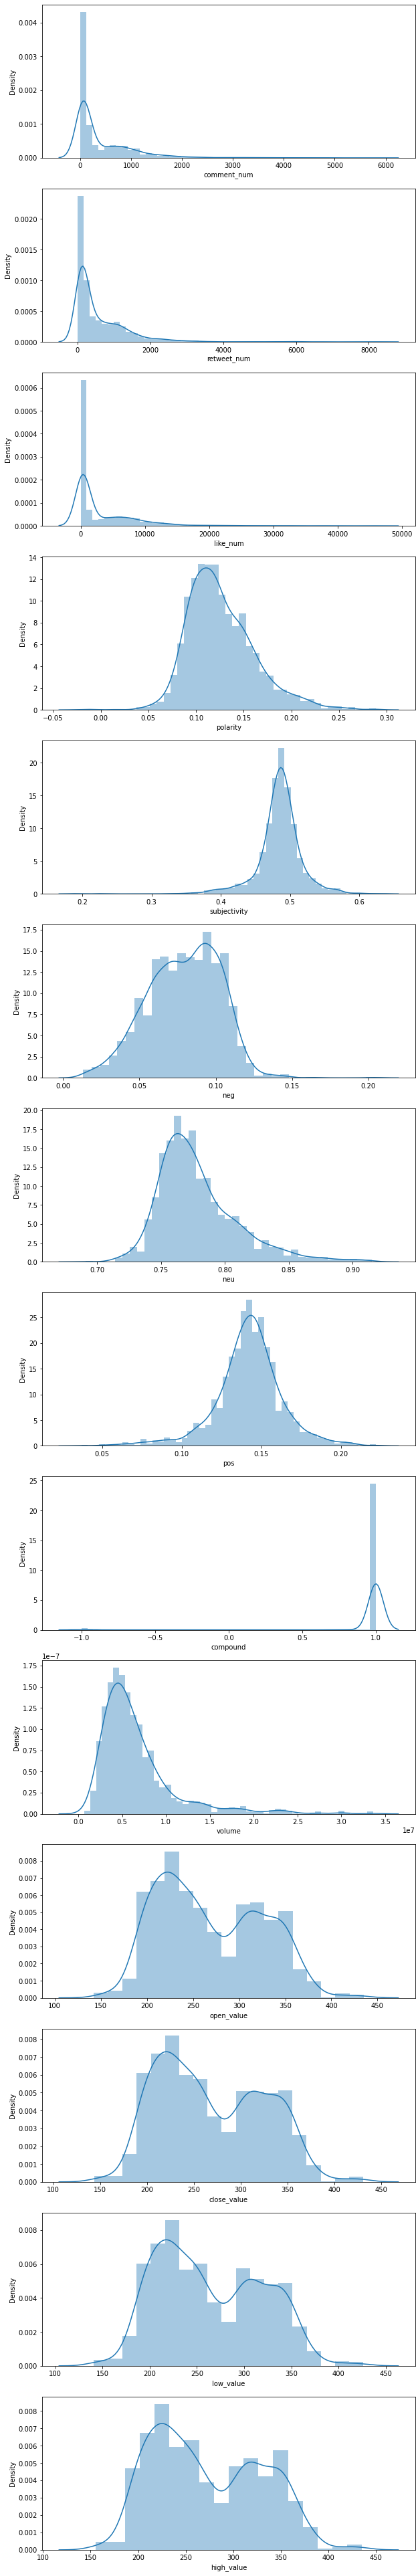

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(tesla_sm_ts_same[col_int].columns):
    sns.distplot(tesla_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

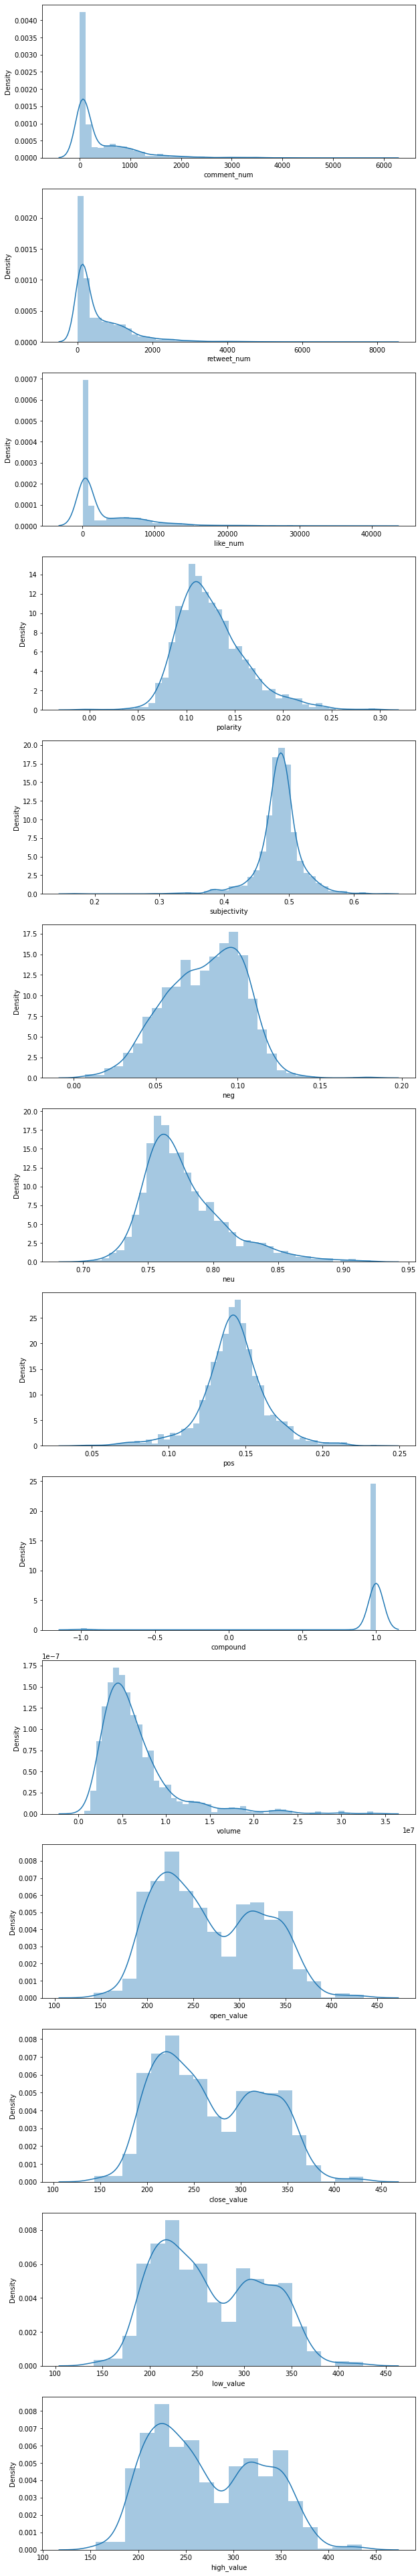

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(tesla_sm_ts_prev[col_int].columns):
    sns.distplot(tesla_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

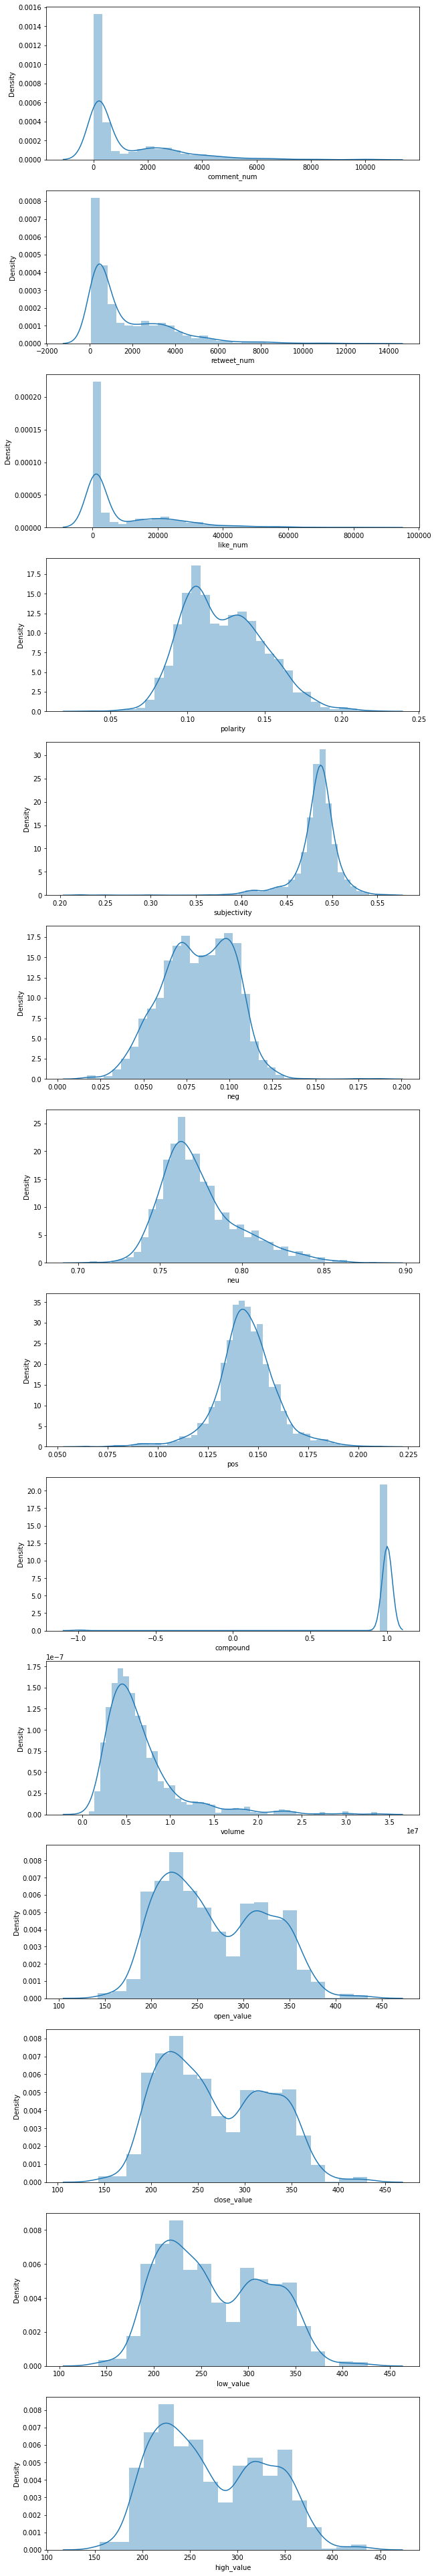

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(tesla_sm_ts_3d[col_int].columns):
    sns.distplot(tesla_sm_ts_3d[col_int][column],ax=axes[i])

### **Exporting the combined datasets**

In [ ]:
# same day
tesla_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/tesla_sm_ts_same.csv',index=False)

# previous day
tesla_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/tesla_sm_ts_prev.csv',index=False)

# last 3 days
tesla_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Tesla/tesla_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = tesla_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

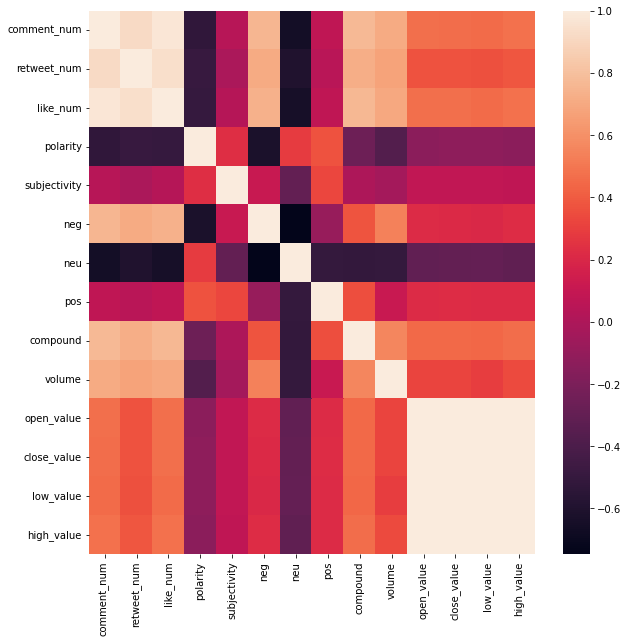

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(tesla_sm_ts_same.corr(method='spearman'))

In [ ]:
display(calc_pvalues(tesla_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0        0  ...           0         0          0
subjectivity      0.0937      0.7911   0.1609  ...      0.0007    0.0004      0.001
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos               0.0017      0.0331   0.0017  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = tesla_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

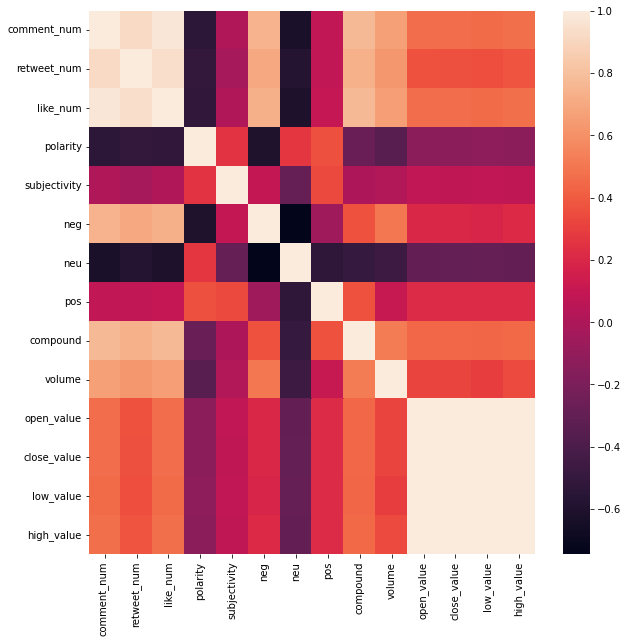

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(tesla_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(tesla_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0        0  ...           0         0          0
subjectivity      0.4572      0.3245   0.6331  ...       0.001    0.0007     0.0008
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos               0.0004      0.0005   0.0001  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = tesla_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

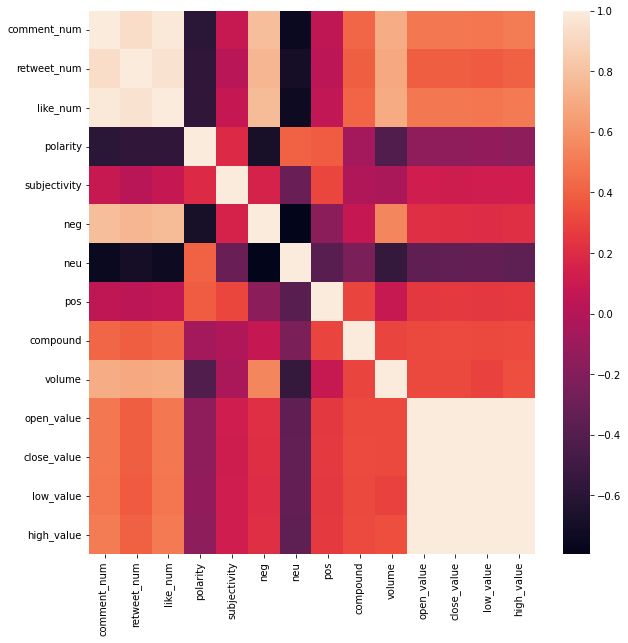

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(tesla_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(tesla_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0        0  ...           0         0          0
subjectivity      0.0002      0.2884   0.0006  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos               0.0441      0.1451   0.0114  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

## **For Amazon**

In [ ]:
# filtering the dataset to get the stock market data of amazon (AMZN)

amazon_sm = company_stock_data[company_stock_data['ticker_symbol']=='AMZN']

# sorting the data and reseting the index
amazon_sm = amazon_sm.sort_values(by='day_date')
amazon_sm.reset_index(drop=True,inplace=True)

display(amazon_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0             AMZN  2010-06-01       123.24  ...      124.97    126.5720   123.0200
1             AMZN  2010-06-02       126.31  ...      124.02    126.4300   121.6500
2             AMZN  2010-06-03       128.76  ...      126.25    129.1500   124.8500
3             AMZN  2010-06-04       122.77  ...      126.33    128.2000   122.1800
4             AMZN  2010-06-07       122.01  ...      125.84    126.6060   121.6744
...            ...         ...          ...  ...         ...         ...        ...
3080          AMZN  2020-05-22      2436.88  ...     2455.01   2469.8500  2430.1300
3081          AMZN  2020-05-26      2421.86  ...     2458.00   2462.0000  2414.0600
3082          AMZN  2020-05-27      2410.39  ...     2404.99   2413.5800  2330.0000
3083          AMZN  2020-05-28      2401.10  ...     2384.33   2436.9699  2378.2300
3084          AMZN  2020-05-29      2442.37  ...     2415.94   2442.3700  2398.1973

[3085 rows x 7 columns]

In [ ]:
# checking info of the dataset
amazon_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3085 non-null   object 
 1   day_date       3085 non-null   object 
 2   close_value    3085 non-null   float64
 3   volume         3085 non-null   int64  
 4   open_value     3085 non-null   float64
 5   high_value     3085 non-null   float64
 6   low_value      3085 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 168.8+ KB


In [ ]:
# converting the 'day_date' column to datetime format
amazon_sm['date'] = pd.to_datetime(amazon_sm['day_date'])
amazon_sm.drop(columns=['day_date'],inplace=True)
display(amazon_sm)
print(amazon_sm.info())

ticker_symbol  close_value   volume  ...  high_value  low_value       date
0             AMZN       123.24  3650661  ...    126.5720   123.0200 2010-06-01
1             AMZN       126.31  4747192  ...    126.4300   121.6500 2010-06-02
2             AMZN       128.76  5272208  ...    129.1500   124.8500 2010-06-03
3             AMZN       122.77  5466912  ...    128.2000   122.1800 2010-06-04
4             AMZN       122.01  6558899  ...    126.6060   121.6744 2010-06-07
...            ...          ...      ...  ...         ...        ...        ...
3080          AMZN      2436.88  2867079  ...   2469.8500  2430.1300 2020-05-22
3081          AMZN      2421.86  3568153  ...   2462.0000  2414.0600 2020-05-26
3082          AMZN      2410.39  5056945  ...   2413.5800  2330.0000 2020-05-27
3083          AMZN      2401.10  3193136  ...   2436.9699  2378.2300 2020-05-28
3084          AMZN      2442.37  3529329  ...   2442.3700  2398.1973 2020-05-29

[3085 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3085 non-null   object        
 1   close_value    3085 non-null   float64       
 2   volume         3085 non-null   int64         
 3   open_value     3085 non-null   float64       
 4   high_value     3085 non-null   float64       
 5   low_value      3085 non-null   float64       
 6   date           3085 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 168.8+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
amazon_sm_same = amazon_sm.loc[(amazon_sm['date']>="2015-01-01") & (amazon_sm['date']<="2020-01-01")]

# viewing the dataset
display(amazon_sm_same)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1156          AMZN       310.35  2048676  ...      312.98   310.0100 2015-01-01
1157          AMZN       308.52  2785167  ...      314.75   306.9601 2015-01-02
1158          AMZN       308.52  2785167  ...      314.75   306.9601 2015-01-03
1159          AMZN       308.52  2785167  ...      314.75   306.9601 2015-01-04
1160          AMZN       302.19  2768215  ...      308.38   300.8500 2015-01-05
...            ...          ...      ...  ...         ...        ...        ...
2977          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-27
2978          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-28
2979          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-29
2980          AMZN      1846.89  3677306  ...     1884.00  1840.6200 2019-12-30
2981          AMZN      1847.84  2510380  ...     1853.26  1832.2300 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
amazon_sm_3d = amazon_sm.loc[(amazon_sm['date']>="2015-01-03") & (amazon_sm['date']<="2020-01-01")]

# viewing the dataset
display(amazon_sm_3d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1158          AMZN       308.52  2785167  ...      314.75   306.9601 2015-01-03
1159          AMZN       308.52  2785167  ...      314.75   306.9601 2015-01-04
1160          AMZN       302.19  2768215  ...      308.38   300.8500 2015-01-05
1161          AMZN       295.29  3511003  ...      303.00   292.3800 2015-01-06
1162          AMZN       298.42  2630671  ...      301.28   295.3300 2015-01-07
...            ...          ...      ...  ...         ...        ...        ...
2977          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-27
2978          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-28
2979          AMZN      1869.80  6188754  ...     1901.40  1866.0100 2019-12-29
2980          AMZN      1846.89  3677306  ...     1884.00  1840.6200 2019-12-30
2981          AMZN      1847.84  2510380  ...     1853.26  1832.2300 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
amazon_sm_7d = amazon_sm.loc[(amazon_sm['date']>="2015-01-07") & (amazon_sm['date']<="2020-01-01")]

# viewing the dataset
display(amazon_sm_7d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1162          AMZN       298.42  2630671  ...      301.28     295.33 2015-01-07
1163          AMZN       300.46  3087475  ...      303.14     296.11 2015-01-08
1164          AMZN       296.93  2589914  ...      302.87     296.68 2015-01-09
1165          AMZN       296.93  2589914  ...      302.87     296.68 2015-01-10
1166          AMZN       296.93  2589914  ...      302.87     296.68 2015-01-11
...            ...          ...      ...  ...         ...        ...        ...
2977          AMZN      1869.80  6188754  ...     1901.40    1866.01 2019-12-27
2978          AMZN      1869.80  6188754  ...     1901.40    1866.01 2019-12-28
2979          AMZN      1869.80  6188754  ...     1901.40    1866.01 2019-12-29
2980          AMZN      1846.89  3677306  ...     1884.00    1840.62 2019-12-30
2981          AMZN      1847.84  2510380  ...     1853.26    1832.23 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
amazon_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/comb_tweets_amazon1_snt.csv')
amazon_tweets_same = amazon_tweets_same.drop(columns=['Unnamed: 0'])
amazon_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
amazon_tweets_same['date'] = pd.to_datetime(amazon_tweets_same['date'])

amazon_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/comb_tweets_amazonprev_snt.csv')
amazon_tweets_prev = amazon_tweets_prev.drop(columns=['Unnamed: 0'])
amazon_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
amazon_tweets_prev['date'] = pd.to_datetime(amazon_tweets_prev['date'])

amazon_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/comb_tweets_amazon3d_snt.csv')
amazon_tweets_3d = amazon_tweets_3d.drop(columns=['Unnamed: 0'])
amazon_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
amazon_tweets_3d['date'] = pd.to_datetime(amazon_tweets_3d['date'])

# viewing the dataframes
display(amazon_tweets_same)
display(amazon_tweets_prev)
display(amazon_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  negative
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  negative
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
amazon_sm_ts_same = pd.merge(amazon_sm_same,amazon_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(amazon_sm_ts_same)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             AMZN       310.35  2048676  ...  0.157   -0.9994   negative
1             AMZN       308.52  2785167  ...  0.162    0.9995   positive
2             AMZN       308.52  2785167  ...  0.125    0.9964   positive
3             AMZN       308.52  2785167  ...  0.109    0.9962   positive
4             AMZN       302.19  2768215  ...  0.180    0.9999   positive
...            ...          ...      ...  ...    ...       ...        ...
1821          AMZN      1869.80  6188754  ...  0.172    1.0000   positive
1822          AMZN      1869.80  6188754  ...  0.170    1.0000   positive
1823          AMZN      1869.80  6188754  ...  0.134    0.9999   positive
1824          AMZN      1846.89  3677306  ...  0.156    1.0000   positive
1825          AMZN      1847.84  2510380  ...  0.153    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(amazon_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
amazon_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
amazon_sm_ts_same = amazon_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',amazon_sm_ts_same.columns)
display(amazon_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ...  low_value  high_value
0    2015-01-01          AMZN  ...   310.0100      312.98
1    2015-01-02          AMZN  ...   306.9601      314.75
2    2015-01-03          AMZN  ...   306.9601      314.75
3    2015-01-04          AMZN  ...   306.9601      314.75
4    2015-01-05          AMZN  ...   300.8500      308.38
...         ...           ...  ...        ...         ...
1821 2019-12-27          AMZN  ...  1866.0100     1901.40
1822 2019-12-28          AMZN  ...  1866.0100     1901.40
1823 2019-12-29          AMZN  ...  1866.0100     1901.40
1824 2019-12-30          AMZN  ...  1840.6200     1884.00
1825 2019-12-31          AMZN  ...  1832.2300     1853.26

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
amazon_sm_ts_prev = pd.merge(amazon_sm_same,amazon_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(amazon_sm_ts_prev)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             AMZN       310.35  2048676  ...  0.159   -0.9994   negative
1             AMZN       308.52  2785167  ...  0.118    0.9826   positive
2             AMZN       308.52  2785167  ...  0.140    0.9993   positive
3             AMZN       308.52  2785167  ...  0.121    0.9958   positive
4             AMZN       302.19  2768215  ...  0.205    0.9998   positive
...            ...          ...      ...  ...    ...       ...        ...
1821          AMZN      1869.80  6188754  ...  0.192    1.0000   positive
1822          AMZN      1869.80  6188754  ...  0.171    1.0000   positive
1823          AMZN      1869.80  6188754  ...  0.160    0.9999   positive
1824          AMZN      1846.89  3677306  ...  0.136    0.9999   positive
1825          AMZN      1847.84  2510380  ...  0.159    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
amazon_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
amazon_sm_ts_prev = amazon_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',amazon_sm_ts_prev.columns)
display(amazon_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ...  low_value  high_value
0    2015-01-01          AMZN  ...   310.0100      312.98
1    2015-01-02          AMZN  ...   306.9601      314.75
2    2015-01-03          AMZN  ...   306.9601      314.75
3    2015-01-04          AMZN  ...   306.9601      314.75
4    2015-01-05          AMZN  ...   300.8500      308.38
...         ...           ...  ...        ...         ...
1821 2019-12-27          AMZN  ...  1866.0100     1901.40
1822 2019-12-28          AMZN  ...  1866.0100     1901.40
1823 2019-12-29          AMZN  ...  1866.0100     1901.40
1824 2019-12-30          AMZN  ...  1840.6200     1884.00
1825 2019-12-31          AMZN  ...  1832.2300     1853.26

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
amazon_sm_ts_3d = pd.merge(amazon_sm_3d,amazon_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(amazon_sm_ts_3d)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             AMZN       308.52  2785167  ...  0.151   -0.8968   positive
1             AMZN       308.52  2785167  ...  0.148    0.9999   positive
2             AMZN       302.19  2768215  ...  0.166    1.0000   positive
3             AMZN       295.29  3511003  ...  0.173    1.0000   positive
4             AMZN       298.42  2630671  ...  0.163    1.0000   positive
...            ...          ...      ...  ...    ...       ...        ...
1819          AMZN      1869.80  6188754  ...  0.178    1.0000   positive
1820          AMZN      1869.80  6188754  ...  0.185    1.0000   positive
1821          AMZN      1869.80  6188754  ...  0.173    1.0000   positive
1822          AMZN      1846.89  3677306  ...  0.154    1.0000   positive
1823          AMZN      1847.84  2510380  ...  0.155    1.0000   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
amazon_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
amazon_sm_ts_3d = amazon_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',amazon_sm_ts_3d.columns)
display(amazon_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ...  low_value  high_value
0    2015-01-03          AMZN  ...   306.9601      314.75
1    2015-01-04          AMZN  ...   306.9601      314.75
2    2015-01-05          AMZN  ...   300.8500      308.38
3    2015-01-06          AMZN  ...   292.3800      303.00
4    2015-01-07          AMZN  ...   295.3300      301.28
...         ...           ...  ...        ...         ...
1819 2019-12-27          AMZN  ...  1866.0100     1901.40
1820 2019-12-28          AMZN  ...  1866.0100     1901.40
1821 2019-12-29          AMZN  ...  1866.0100     1901.40
1822 2019-12-30          AMZN  ...  1840.6200     1884.00
1823 2019-12-31          AMZN  ...  1832.2300     1853.26

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

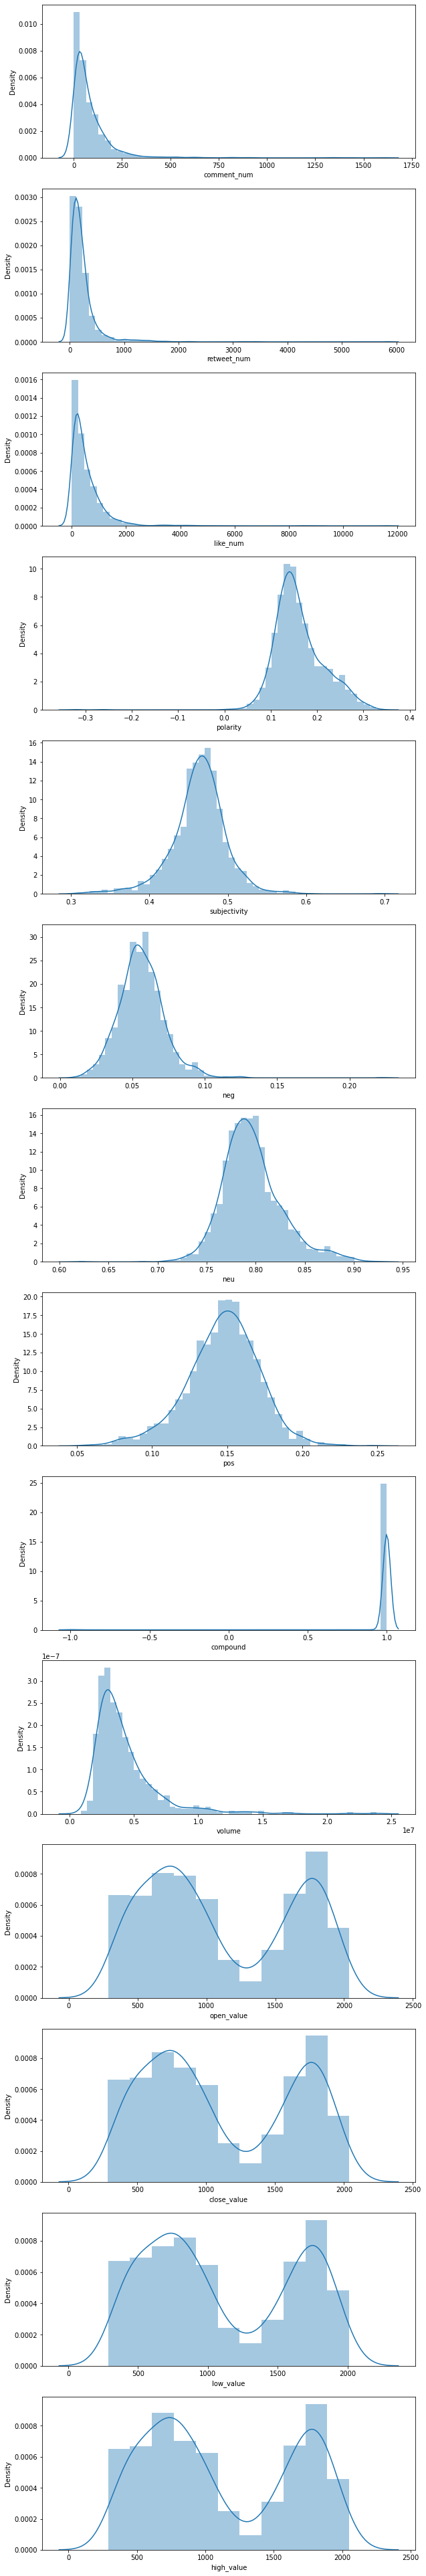

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(amazon_sm_ts_same[col_int].columns):
    sns.distplot(amazon_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

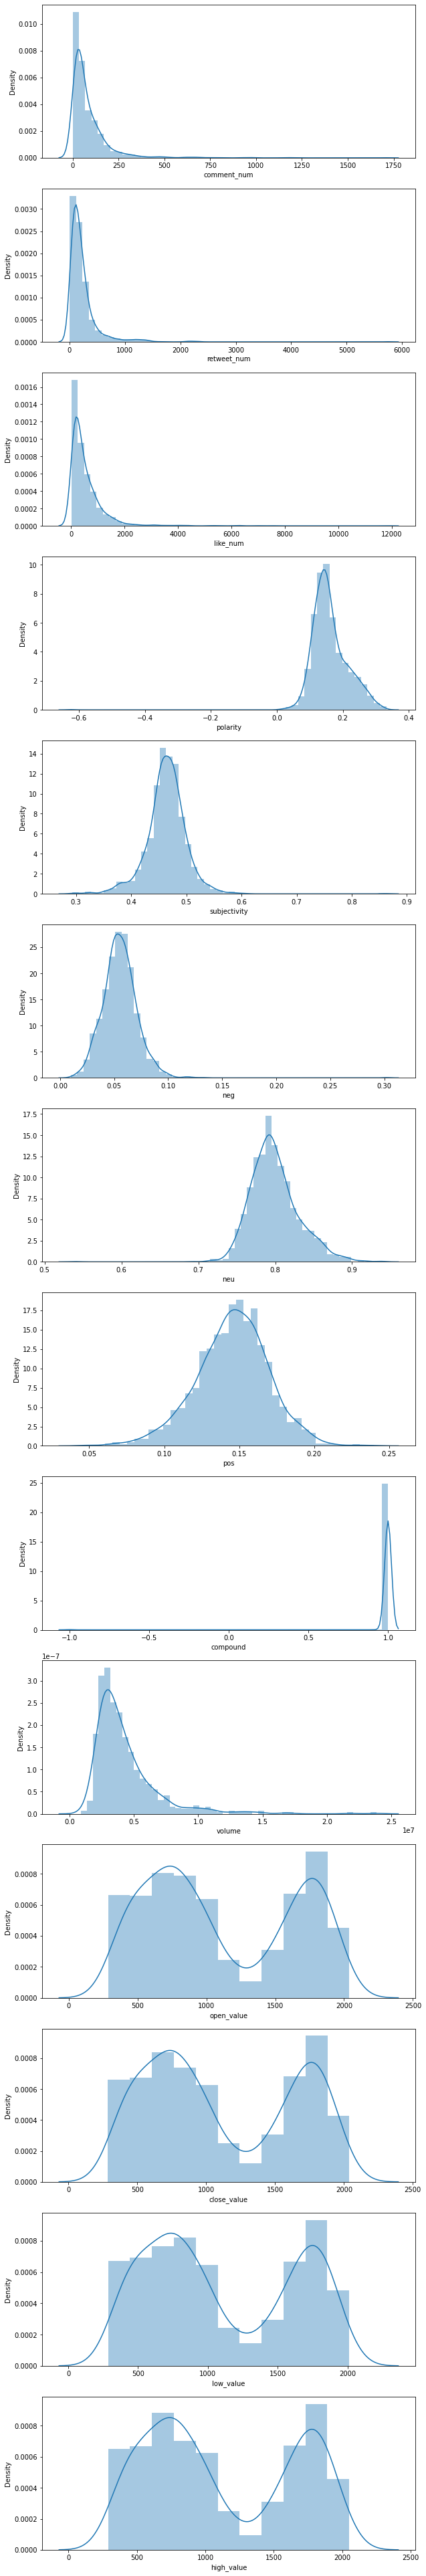

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(amazon_sm_ts_prev[col_int].columns):
    sns.distplot(amazon_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

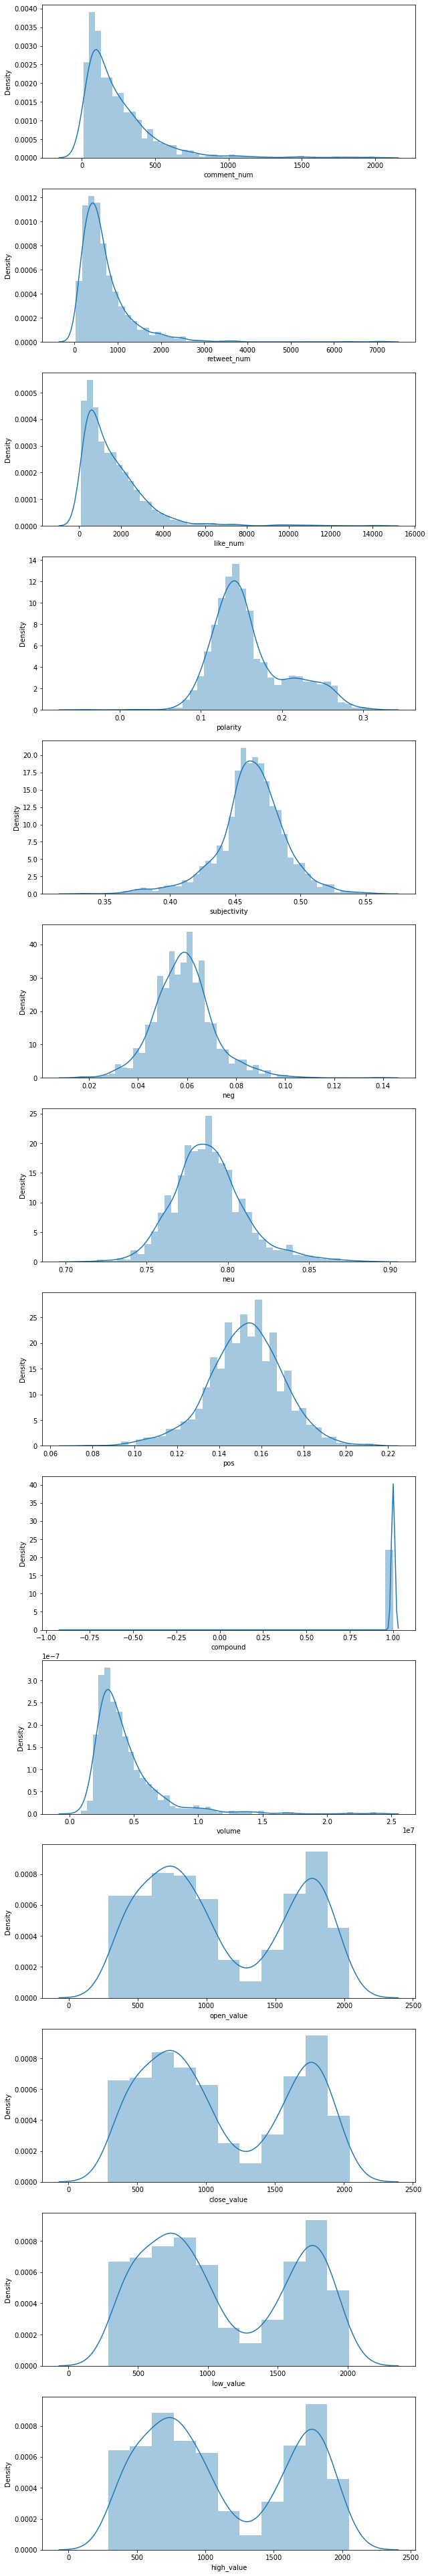

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(amazon_sm_ts_3d[col_int].columns):
    sns.distplot(amazon_sm_ts_3d[col_int][column],ax=axes[i])

###**Exporting the combined datasets**

In [ ]:
# same day
amazon_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/amazon_sm_ts_same.csv',index=False)

# previous day
amazon_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/amazon_sm_ts_prev.csv',index=False)

# last 3 days
amazon_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Amazon/amazon_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = amazon_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

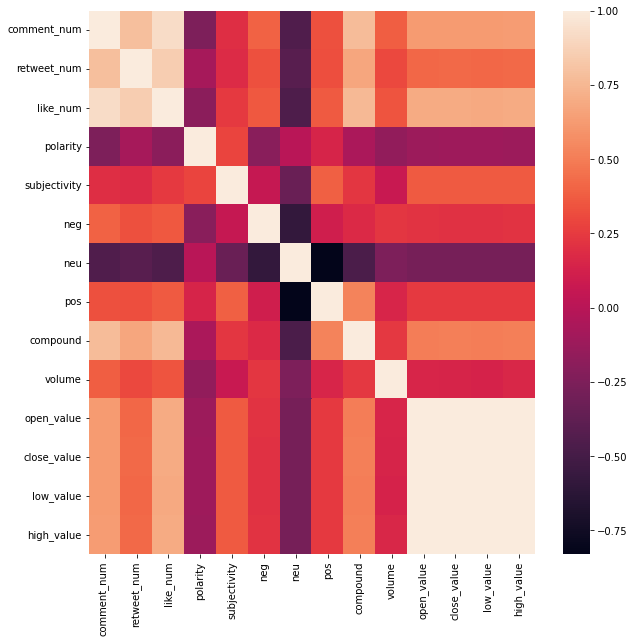

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(amazon_sm_ts_same.corr(method='spearman'))

In [ ]:
display(calc_pvalues(amazon_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.0007        0  ...           0         0          0
subjectivity           0           0        0  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = amazon_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

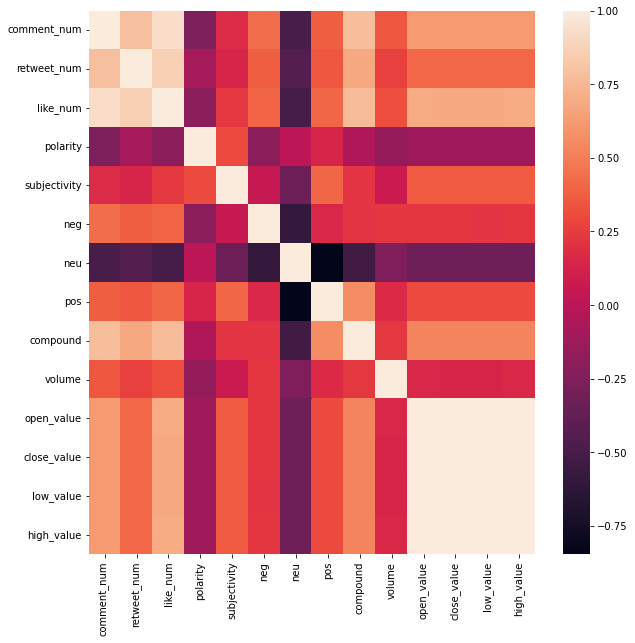

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(amazon_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(amazon_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.0003        0  ...           0         0          0
subjectivity           0           0        0  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = amazon_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

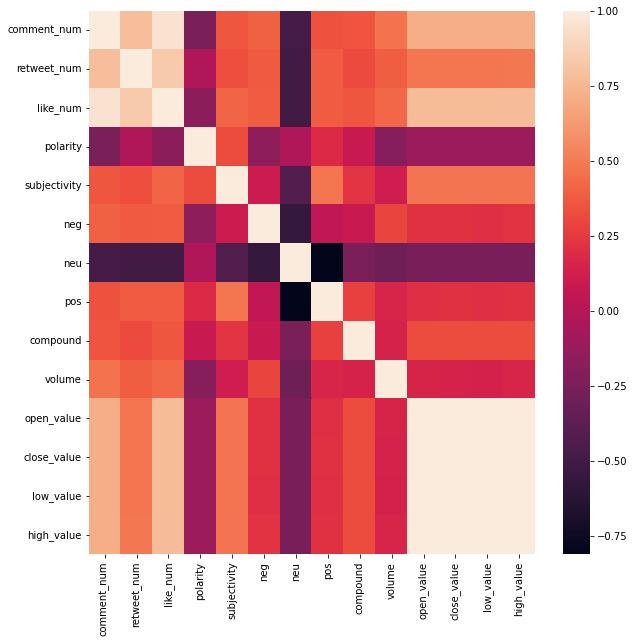

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(amazon_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(amazon_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.2284        0  ...           0         0          0
subjectivity           0           0        0  ...           0         0          0
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...           0         0          0
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

## **For Microsoft**

In [ ]:
# filtering the dataset to get the stock market data of microsoft (MSFT)

microsoft_sm = company_stock_data[company_stock_data['ticker_symbol']=='MSFT']

# sorting the data and reseting the index
microsoft_sm = microsoft_sm.sort_values(by='day_date')
microsoft_sm.reset_index(drop=True,inplace=True)

display(microsoft_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0             MSFT  2010-06-01        25.89  ...       25.53     26.3100      25.52
1             MSFT  2010-06-02        26.46  ...       26.06     26.4800      25.73
2             MSFT  2010-06-03        26.86  ...       26.55     26.9300      26.41
3             MSFT  2010-06-04        25.79  ...       26.10     26.5700      25.62
4             MSFT  2010-06-07        25.29  ...       25.82     25.8300      25.24
...            ...         ...          ...  ...         ...         ...        ...
3080          MSFT  2020-05-22       183.51  ...      183.19    184.4600     182.54
3081          MSFT  2020-05-26       181.57  ...      186.34    186.5000     181.10
3082          MSFT  2020-05-27       181.81  ...      180.20    181.9877     176.60
3083          MSFT  2020-05-28       181.40  ...      180.74    184.1474     180.38
3084          MSFT  2020-05-29       183.25  ...      182.73    184.2700     180.41

[3085 rows x 7 columns]

In [ ]:
# checking info of the dataset
microsoft_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3085 non-null   object 
 1   day_date       3085 non-null   object 
 2   close_value    3085 non-null   float64
 3   volume         3085 non-null   int64  
 4   open_value     3085 non-null   float64
 5   high_value     3085 non-null   float64
 6   low_value      3085 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 168.8+ KB


In [ ]:
# converting the 'day_date' column to datetime format
microsoft_sm['date'] = pd.to_datetime(microsoft_sm['day_date'])
microsoft_sm.drop(columns=['day_date'],inplace=True)
display(microsoft_sm)
print(microsoft_sm.info())

ticker_symbol  close_value    volume  ...  high_value  low_value       date
0             MSFT        25.89  76120800  ...     26.3100      25.52 2010-06-01
1             MSFT        26.46  65259520  ...     26.4800      25.73 2010-06-02
2             MSFT        26.86  67797970  ...     26.9300      26.41 2010-06-03
3             MSFT        25.79  89508290  ...     26.5700      25.62 2010-06-04
4             MSFT        25.29  80327890  ...     25.8300      25.24 2010-06-07
...            ...          ...       ...  ...         ...        ...        ...
3080          MSFT       183.51  20826900  ...    184.4600     182.54 2020-05-22
3081          MSFT       181.57  36073610  ...    186.5000     181.10 2020-05-26
3082          MSFT       181.81  39517150  ...    181.9877     176.60 2020-05-27
3083          MSFT       181.40  33831820  ...    184.1474     180.38 2020-05-28
3084          MSFT       183.25  42146720  ...    184.2700     180.41 2020-05-29

[3085 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3085 non-null   object        
 1   close_value    3085 non-null   float64       
 2   volume         3085 non-null   int64         
 3   open_value     3085 non-null   float64       
 4   high_value     3085 non-null   float64       
 5   low_value      3085 non-null   float64       
 6   date           3085 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 168.8+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
microsoft_sm_same = microsoft_sm.loc[(microsoft_sm['date']>="2015-01-01") & (microsoft_sm['date']<="2020-01-01")]

# viewing the dataset
display(microsoft_sm_same)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1156          MSFT       46.450  21551090  ...       47.44      46.45 2015-01-01
1157          MSFT       46.760  27843560  ...       47.42      46.54 2015-01-02
1158          MSFT       46.760  27843560  ...       47.42      46.54 2015-01-03
1159          MSFT       46.760  27843560  ...       47.42      46.54 2015-01-04
1160          MSFT       46.325  39667400  ...       46.73      46.25 2015-01-05
...            ...          ...       ...  ...         ...        ...        ...
2977          MSFT      158.960  18414350  ...      159.55     158.22 2019-12-27
2978          MSFT      158.960  18414350  ...      159.55     158.22 2019-12-28
2979          MSFT      158.960  18414350  ...      159.55     158.22 2019-12-29
2980          MSFT      157.590  16356720  ...      159.02     156.73 2019-12-30
2981          MSFT      157.700  18393380  ...      157.77     156.45 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
microsoft_sm_3d = microsoft_sm.loc[(microsoft_sm['date']>="2015-01-03") & (microsoft_sm['date']<="2020-01-01")]

# viewing the dataset
display(microsoft_sm_3d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1158          MSFT       46.760  27843560  ...      47.420      46.54 2015-01-03
1159          MSFT       46.760  27843560  ...      47.420      46.54 2015-01-04
1160          MSFT       46.325  39667400  ...      46.730      46.25 2015-01-05
1161          MSFT       45.650  36434980  ...      46.749      45.54 2015-01-06
1162          MSFT       46.230  29103920  ...      46.460      45.49 2015-01-07
...            ...          ...       ...  ...         ...        ...        ...
2977          MSFT      158.960  18414350  ...     159.550     158.22 2019-12-27
2978          MSFT      158.960  18414350  ...     159.550     158.22 2019-12-28
2979          MSFT      158.960  18414350  ...     159.550     158.22 2019-12-29
2980          MSFT      157.590  16356720  ...     159.020     156.73 2019-12-30
2981          MSFT      157.700  18393380  ...     157.770     156.45 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
microsoft_sm_7d = microsoft_sm.loc[(microsoft_sm['date']>="2015-01-07") & (microsoft_sm['date']<="2020-01-01")]

# viewing the dataset
display(microsoft_sm_7d)

ticker_symbol  close_value    volume  ...  high_value  low_value       date
1162          MSFT        46.23  29103920  ...     46.4600      45.49 2015-01-07
1163          MSFT        47.59  29634030  ...     47.7499      46.72 2015-01-08
1164          MSFT        47.19  23942750  ...     47.8200      46.90 2015-01-09
1165          MSFT        47.19  23942750  ...     47.8200      46.90 2015-01-10
1166          MSFT        47.19  23942750  ...     47.8200      46.90 2015-01-11
...            ...          ...       ...  ...         ...        ...        ...
2977          MSFT       158.96  18414350  ...    159.5500     158.22 2019-12-27
2978          MSFT       158.96  18414350  ...    159.5500     158.22 2019-12-28
2979          MSFT       158.96  18414350  ...    159.5500     158.22 2019-12-29
2980          MSFT       157.59  16356720  ...    159.0200     156.73 2019-12-30
2981          MSFT       157.70  18393380  ...    157.7700     156.45 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
microsoft_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/comb_tweets_microsoft1_snt.csv')
microsoft_tweets_same = microsoft_tweets_same.drop(columns=['Unnamed: 0'])
microsoft_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
microsoft_tweets_same['date'] = pd.to_datetime(microsoft_tweets_same['date'])

microsoft_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/comb_tweets_microsoftprev_snt.csv')
microsoft_tweets_prev = microsoft_tweets_prev.drop(columns=['Unnamed: 0'])
microsoft_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
microsoft_tweets_prev['date'] = pd.to_datetime(microsoft_tweets_prev['date'])

microsoft_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/comb_tweets_microsoft3d_snt.csv')
microsoft_tweets_3d = microsoft_tweets_3d.drop(columns=['Unnamed: 0'])
microsoft_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
microsoft_tweets_3d['date'] = pd.to_datetime(microsoft_tweets_3d['date'])

# viewing the dataframes
display(microsoft_tweets_same)
display(microsoft_tweets_prev)
display(microsoft_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
microsoft_sm_ts_same = pd.merge(microsoft_sm_same,microsoft_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(microsoft_sm_ts_same)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             MSFT       46.450  21551090  ...  0.091    0.9906   positive
1             MSFT       46.760  27843560  ...  0.082    0.9924   positive
2             MSFT       46.760  27843560  ...  0.132    0.9986   positive
3             MSFT       46.760  27843560  ...  0.113    0.9919   positive
4             MSFT       46.325  39667400  ...  0.091    0.9983   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          MSFT      158.960  18414350  ...  0.109    0.9999   positive
1822          MSFT      158.960  18414350  ...  0.091    0.9992   positive
1823          MSFT      158.960  18414350  ...  0.078    0.9979   positive
1824          MSFT      157.590  16356720  ...  0.123    1.0000   positive
1825          MSFT      157.700  18393380  ...  0.122    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(microsoft_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
microsoft_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
microsoft_sm_ts_same = microsoft_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',microsoft_sm_ts_same.columns)
display(microsoft_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          MSFT  ...     46.45       47.44
1    2015-01-02          MSFT  ...     46.54       47.42
2    2015-01-03          MSFT  ...     46.54       47.42
3    2015-01-04          MSFT  ...     46.54       47.42
4    2015-01-05          MSFT  ...     46.25       46.73
...         ...           ...  ...       ...         ...
1821 2019-12-27          MSFT  ...    158.22      159.55
1822 2019-12-28          MSFT  ...    158.22      159.55
1823 2019-12-29          MSFT  ...    158.22      159.55
1824 2019-12-30          MSFT  ...    156.73      159.02
1825 2019-12-31          MSFT  ...    156.45      157.77

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
microsoft_sm_ts_prev = pd.merge(microsoft_sm_same,microsoft_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(microsoft_sm_ts_prev)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             MSFT       46.450  21551090  ...  0.111    0.8519   positive
1             MSFT       46.760  27843560  ...  0.120    0.9842   positive
2             MSFT       46.760  27843560  ...  0.145    0.9987   positive
3             MSFT       46.760  27843560  ...  0.149    0.9943   positive
4             MSFT       46.325  39667400  ...  0.136    0.9928   positive
...            ...          ...       ...  ...    ...       ...        ...
1821          MSFT      158.960  18414350  ...  0.131    0.9999   positive
1822          MSFT      158.960  18414350  ...  0.135    0.9999   positive
1823          MSFT      158.960  18414350  ...  0.087    0.9967   positive
1824          MSFT      157.590  16356720  ...  0.146    0.9994   positive
1825          MSFT      157.700  18393380  ...  0.147    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
microsoft_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
microsoft_sm_ts_prev = microsoft_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',microsoft_sm_ts_prev.columns)
display(microsoft_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          MSFT  ...     46.45       47.44
1    2015-01-02          MSFT  ...     46.54       47.42
2    2015-01-03          MSFT  ...     46.54       47.42
3    2015-01-04          MSFT  ...     46.54       47.42
4    2015-01-05          MSFT  ...     46.25       46.73
...         ...           ...  ...       ...         ...
1821 2019-12-27          MSFT  ...    158.22      159.55
1822 2019-12-28          MSFT  ...    158.22      159.55
1823 2019-12-29          MSFT  ...    158.22      159.55
1824 2019-12-30          MSFT  ...    156.73      159.02
1825 2019-12-31          MSFT  ...    156.45      157.77

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
microsoft_sm_ts_3d = pd.merge(microsoft_sm_3d,microsoft_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(microsoft_sm_ts_3d)

ticker_symbol  close_value    volume  ...    pos  compound  sentiment
0             MSFT       46.760  27843560  ...  0.140    0.9994   positive
1             MSFT       46.760  27843560  ...  0.132    0.9990   positive
2             MSFT       46.325  39667400  ...  0.160    0.9998   positive
3             MSFT       45.650  36434980  ...  0.159    0.9998   positive
4             MSFT       46.230  29103920  ...  0.142    0.9998   positive
...            ...          ...       ...  ...    ...       ...        ...
1819          MSFT      158.960  18414350  ...  0.137    1.0000   positive
1820          MSFT      158.960  18414350  ...  0.132    1.0000   positive
1821          MSFT      158.960  18414350  ...  0.130    1.0000   positive
1822          MSFT      157.590  16356720  ...  0.140    1.0000   positive
1823          MSFT      157.700  18393380  ...  0.158    1.0000   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
microsoft_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
microsoft_sm_ts_3d = microsoft_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',microsoft_sm_ts_3d.columns)
display(microsoft_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-03          MSFT  ...     46.54      47.420
1    2015-01-04          MSFT  ...     46.54      47.420
2    2015-01-05          MSFT  ...     46.25      46.730
3    2015-01-06          MSFT  ...     45.54      46.749
4    2015-01-07          MSFT  ...     45.49      46.460
...         ...           ...  ...       ...         ...
1819 2019-12-27          MSFT  ...    158.22     159.550
1820 2019-12-28          MSFT  ...    158.22     159.550
1821 2019-12-29          MSFT  ...    158.22     159.550
1822 2019-12-30          MSFT  ...    156.73     159.020
1823 2019-12-31          MSFT  ...    156.45     157.770

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

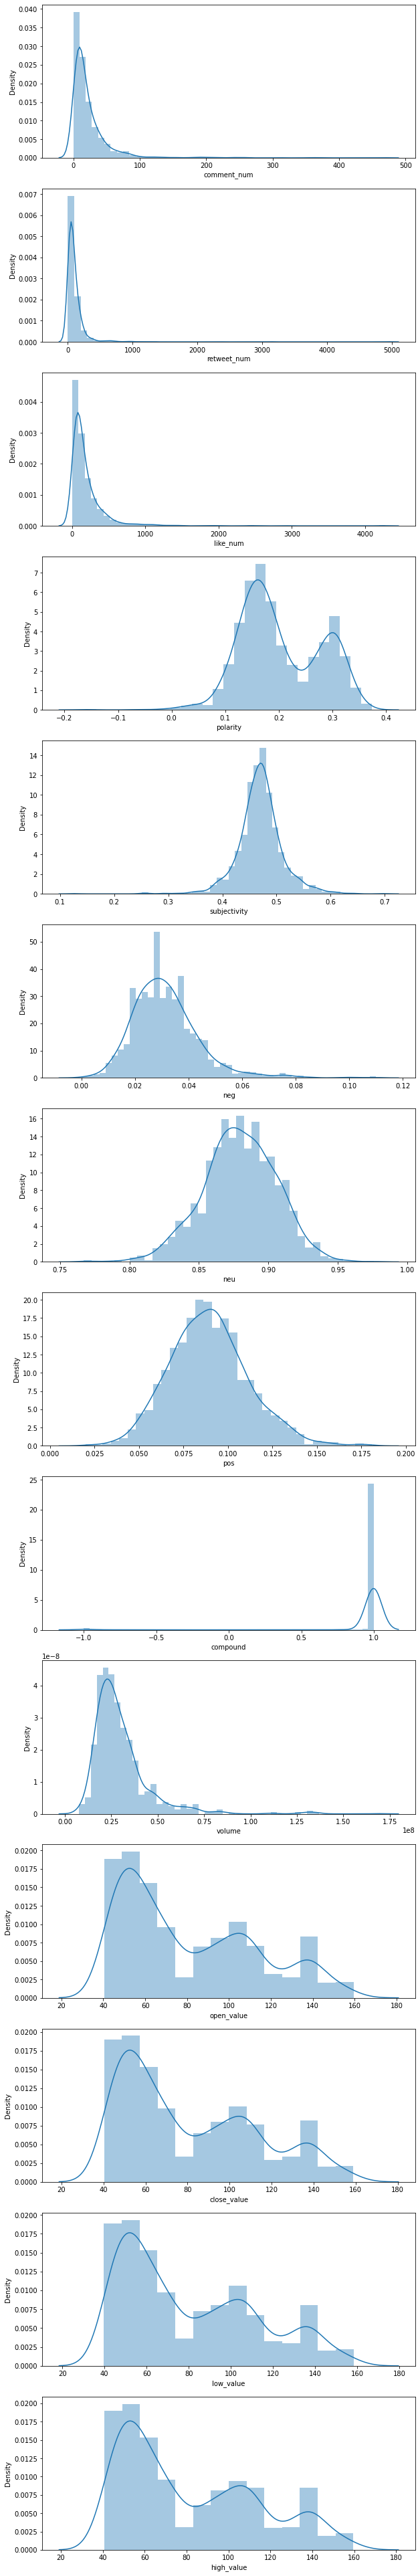

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(microsoft_sm_ts_same[col_int].columns):
    sns.distplot(microsoft_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

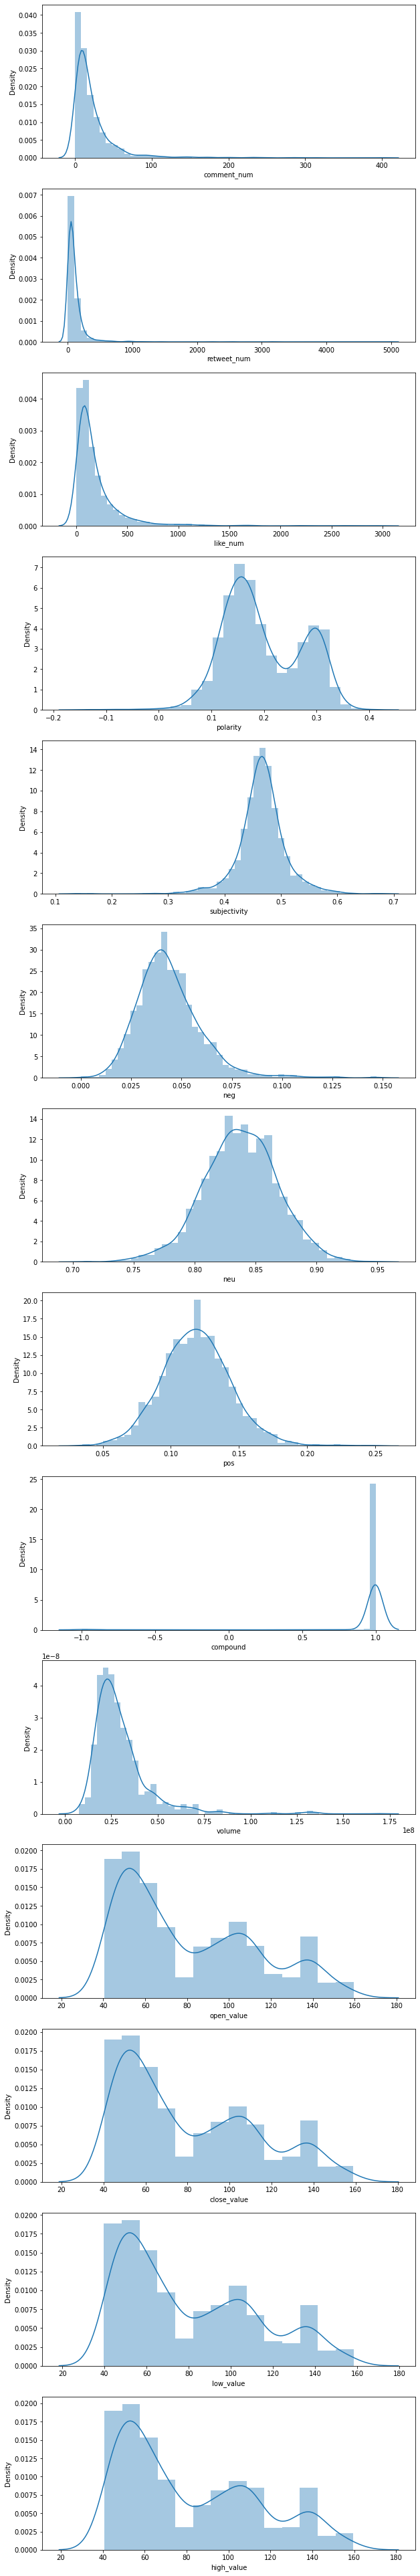

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(microsoft_sm_ts_prev[col_int].columns):
    sns.distplot(microsoft_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

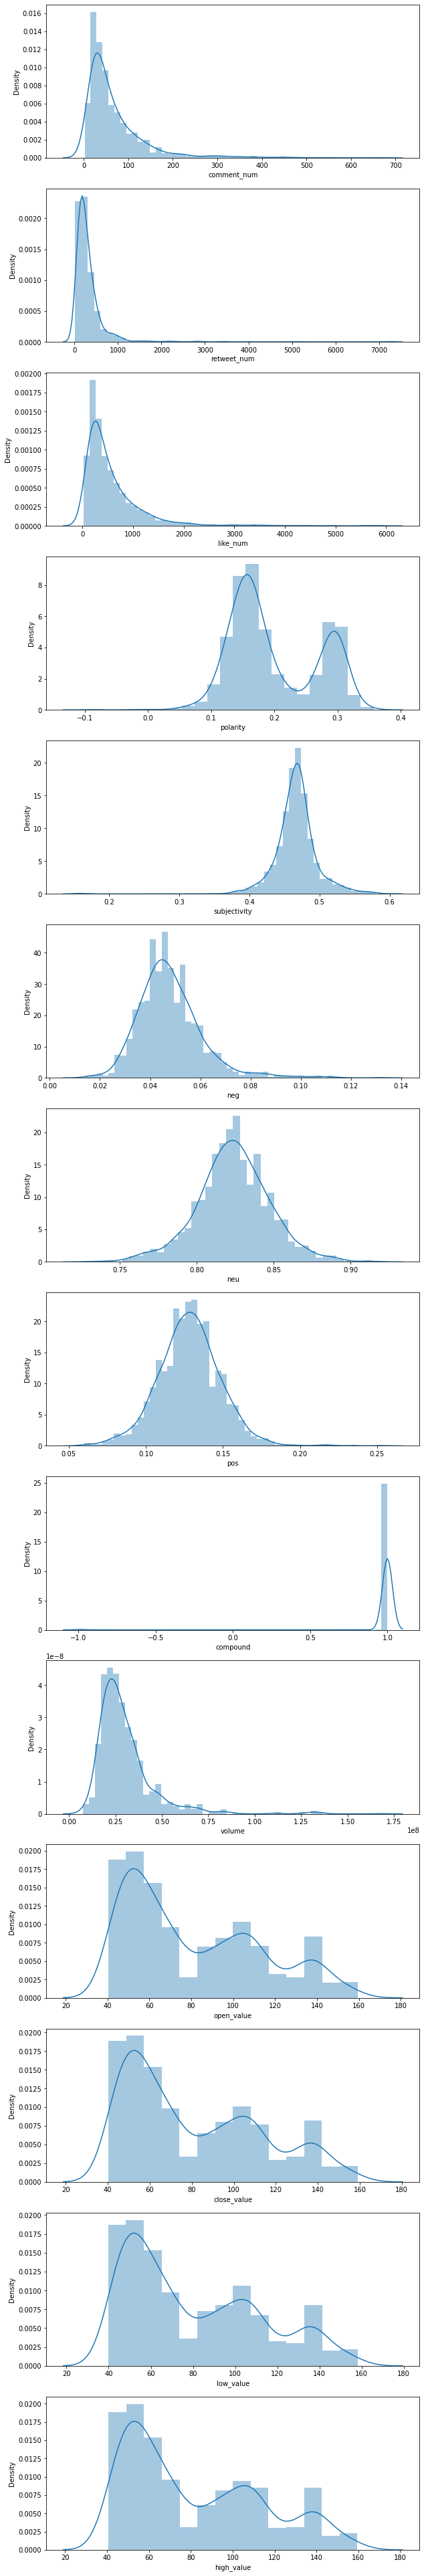

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(microsoft_sm_ts_3d[col_int].columns):
    sns.distplot(microsoft_sm_ts_3d[col_int][column],ax=axes[i])

### **Exporting the combined datasets**

In [ ]:
# same day
microsoft_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/microsoft_sm_ts_same.csv',index=False)

# previous day
microsoft_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/microsoft_sm_ts_prev.csv',index=False)

# last 3 days
microsoft_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Microsoft/microsoft_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = microsoft_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

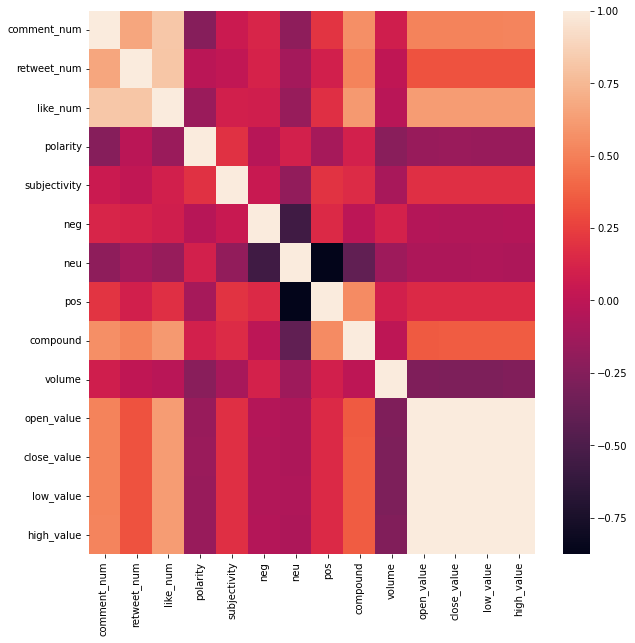

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(microsoft_sm_ts_same.corr(method='spearman'))

In [ ]:
display(calc_pvalues(microsoft_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.4655        0  ...           0         0          0
subjectivity      0.0145      0.4979        0  ...           0         0          0
neg                    0           0   0.0003  ...      0.0293      0.03     0.0414
neu                    0           0        0  ...      0.0026    0.0027     0.0021
pos                    0      0.0001        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume            0.0002      0.7938   0.3397  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = microsoft_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

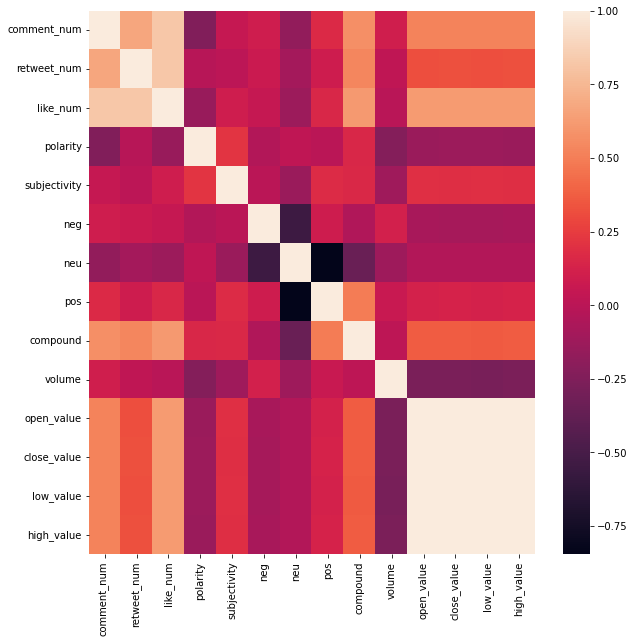

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(microsoft_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(microsoft_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.6034        0  ...           0         0          0
subjectivity       0.019      0.6536        0  ...           0         0          0
neg               0.0001      0.0012   0.0347  ...      0.0004    0.0004     0.0007
neu                    0           0        0  ...      0.1556    0.1643     0.1381
pos                    0      0.0001        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0      0.3616   0.8721  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = microsoft_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

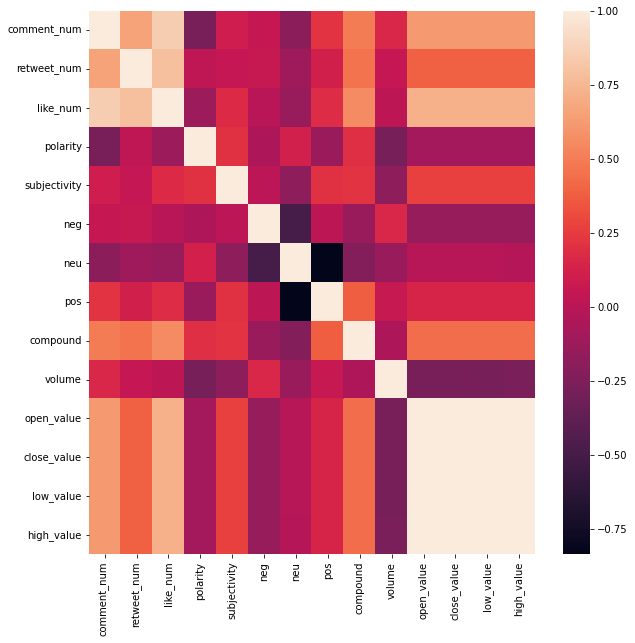

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(microsoft_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(microsoft_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0      0.1867        0  ...      0.0002    0.0002     0.0001
subjectivity           0      0.0348        0  ...           0         0          0
neg               0.0183      0.0061   0.9981  ...           0         0          0
neu                    0           0        0  ...      0.6484    0.6755     0.6087
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0      0.0394   0.3494  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

## **For Goog**

In [ ]:
# filtering the dataset to get the stock market data of goog (GOOG)

goog_sm = company_stock_data[company_stock_data['ticker_symbol']=='GOOG']

# sorting the data and reseting the index
goog_sm = goog_sm.sort_values(by='day_date')
goog_sm.reset_index(drop=True,inplace=True)

display(goog_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0             GOOG  2014-03-27       558.46  ...      568.00      568.00     552.92
1             GOOG  2014-03-28       559.99  ...      561.20      566.43     558.67
2             GOOG  2014-03-31       556.97  ...      566.89      567.00     556.93
3             GOOG  2014-04-01       567.16  ...      558.71      568.45     558.71
4             GOOG  2014-04-02       567.00  ...      599.99      604.83     562.19
...            ...         ...          ...  ...         ...         ...        ...
2118          GOOG  2020-05-22      1410.42  ...     1396.71     1412.76    1391.83
2119          GOOG  2020-05-26      1417.02  ...     1437.27     1441.00    1412.13
2120          GOOG  2020-05-27      1417.84  ...     1417.25     1421.74    1391.29
2121          GOOG  2020-05-28      1416.73  ...     1396.86     1440.84    1396.00
2122          GOOG  2020-05-29      1428.92  ...     1416.94     1432.57    1413.35

[2123 rows x 7 columns]

In [ ]:
# checking info of the dataset
goog_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  2123 non-null   object 
 1   day_date       2123 non-null   object 
 2   close_value    2123 non-null   float64
 3   volume         2123 non-null   int64  
 4   open_value     2123 non-null   float64
 5   high_value     2123 non-null   float64
 6   low_value      2123 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 116.2+ KB


In [ ]:
# converting the 'day_date' column to datetime format
goog_sm['date'] = pd.to_datetime(goog_sm['day_date'])
goog_sm.drop(columns=['day_date'],inplace=True)
display(goog_sm)
print(goog_sm.info())

ticker_symbol  close_value   volume  ...  high_value  low_value       date
0             GOOG       558.46    13052  ...      568.00     552.92 2014-03-27
1             GOOG       559.99    41003  ...      566.43     558.67 2014-03-28
2             GOOG       556.97    10772  ...      567.00     556.93 2014-03-31
3             GOOG       567.16     7932  ...      568.45     558.71 2014-04-01
4             GOOG       567.00   146697  ...      604.83     562.19 2014-04-02
...            ...          ...      ...  ...         ...        ...        ...
2118          GOOG      1410.42  1309408  ...     1412.76    1391.83 2020-05-22
2119          GOOG      1417.02  2060643  ...     1441.00    1412.13 2020-05-26
2120          GOOG      1417.84  1686142  ...     1421.74    1391.29 2020-05-27
2121          GOOG      1416.73  1693976  ...     1440.84    1396.00 2020-05-28
2122          GOOG      1428.92  1838059  ...     1432.57    1413.35 2020-05-29

[2123 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  2123 non-null   object        
 1   close_value    2123 non-null   float64       
 2   volume         2123 non-null   int64         
 3   open_value     2123 non-null   float64       
 4   high_value     2123 non-null   float64       
 5   low_value      2123 non-null   float64       
 6   date           2123 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 116.2+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
goog_sm_same = goog_sm.loc[(goog_sm['date']>="2015-01-01") & (goog_sm['date']<="2020-01-01")]

# viewing the dataset
display(goog_sm_same)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
194           GOOG       526.40  1367110  ...      532.60    525.800 2015-01-01
195           GOOG       524.81  1444809  ...      531.27    524.100 2015-01-02
196           GOOG       524.81  1444809  ...      531.27    524.100 2015-01-03
197           GOOG       524.81  1444809  ...      531.27    524.100 2015-01-04
198           GOOG       513.87  2049303  ...      524.33    513.060 2015-01-05
...            ...          ...      ...  ...         ...        ...        ...
2015          GOOG      1351.89  1038718  ...     1364.53   1349.310 2019-12-27
2016          GOOG      1351.89  1038718  ...     1364.53   1349.310 2019-12-28
2017          GOOG      1351.89  1038718  ...     1364.53   1349.310 2019-12-29
2018          GOOG      1336.14  1051323  ...     1353.00   1334.020 2019-12-30
2019          GOOG      1337.02   962468  ...     1338.00   1329.085 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
goog_sm_3d = goog_sm.loc[(goog_sm['date']>="2015-01-03") & (goog_sm['date']<="2020-01-01")]

# viewing the dataset
display(goog_sm_3d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
196           GOOG       524.81  1444809  ...     531.270    524.100 2015-01-03
197           GOOG       524.81  1444809  ...     531.270    524.100 2015-01-04
198           GOOG       513.87  2049303  ...     524.330    513.060 2015-01-05
199           GOOG       501.96  2884479  ...     516.175    501.050 2015-01-06
200           GOOG       501.10  2053750  ...     507.244    499.650 2015-01-07
...            ...          ...      ...  ...         ...        ...        ...
2015          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-27
2016          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-28
2017          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-29
2018          GOOG      1336.14  1051323  ...    1353.000   1334.020 2019-12-30
2019          GOOG      1337.02   962468  ...    1338.000   1329.085 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
goog_sm_7d = goog_sm.loc[(goog_sm['date']>="2015-01-07") & (goog_sm['date']<="2020-01-01")]

# viewing the dataset
display(goog_sm_7d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
200           GOOG       501.10  2053750  ...     507.244    499.650 2015-01-07
201           GOOG       502.68  3341935  ...     503.480    491.000 2015-01-08
202           GOOG       496.17  2063743  ...     504.920    494.790 2015-01-09
203           GOOG       496.17  2063743  ...     504.920    494.790 2015-01-10
204           GOOG       496.17  2063743  ...     504.920    494.790 2015-01-11
...            ...          ...      ...  ...         ...        ...        ...
2015          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-27
2016          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-28
2017          GOOG      1351.89  1038718  ...    1364.530   1349.310 2019-12-29
2018          GOOG      1336.14  1051323  ...    1353.000   1334.020 2019-12-30
2019          GOOG      1337.02   962468  ...    1338.000   1329.085 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
goog_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/comb_tweets_goog1_snt.csv')
goog_tweets_same = goog_tweets_same.drop(columns=['Unnamed: 0'])
goog_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
goog_tweets_same['date'] = pd.to_datetime(goog_tweets_same['date'])

goog_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/comb_tweets_googprev_snt.csv')
goog_tweets_prev = goog_tweets_prev.drop(columns=['Unnamed: 0'])
goog_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
goog_tweets_prev['date'] = pd.to_datetime(goog_tweets_prev['date'])

goog_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/comb_tweets_goog3d_snt.csv')
goog_tweets_3d = goog_tweets_3d.drop(columns=['Unnamed: 0'])
goog_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
goog_tweets_3d['date'] = pd.to_datetime(goog_tweets_3d['date'])

# viewing the dataframes
display(goog_tweets_same)
display(goog_tweets_prev)
display(goog_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
goog_sm_ts_same = pd.merge(goog_sm_same,goog_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(goog_sm_ts_same)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             GOOG       526.40  1367110  ...  0.163    0.9979   positive
1             GOOG       524.81  1444809  ...  0.130    0.9990   positive
2             GOOG       524.81  1444809  ...  0.218    0.9999   positive
3             GOOG       524.81  1444809  ...  0.157    0.9999   positive
4             GOOG       513.87  2049303  ...  0.205    1.0000   positive
...            ...          ...      ...  ...    ...       ...        ...
1821          GOOG      1351.89  1038718  ...  0.106    0.9995   positive
1822          GOOG      1351.89  1038718  ...  0.102    0.9951   positive
1823          GOOG      1351.89  1038718  ...  0.063    0.8370   positive
1824          GOOG      1336.14  1051323  ...  0.169    1.0000   positive
1825          GOOG      1337.02   962468  ...  0.152    0.9998   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(goog_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
goog_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
goog_sm_ts_same = goog_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',goog_sm_ts_same.columns)
display(goog_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          GOOG  ...   525.800      532.60
1    2015-01-02          GOOG  ...   524.100      531.27
2    2015-01-03          GOOG  ...   524.100      531.27
3    2015-01-04          GOOG  ...   524.100      531.27
4    2015-01-05          GOOG  ...   513.060      524.33
...         ...           ...  ...       ...         ...
1821 2019-12-27          GOOG  ...  1349.310     1364.53
1822 2019-12-28          GOOG  ...  1349.310     1364.53
1823 2019-12-29          GOOG  ...  1349.310     1364.53
1824 2019-12-30          GOOG  ...  1334.020     1353.00
1825 2019-12-31          GOOG  ...  1329.085     1338.00

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
goog_sm_ts_prev = pd.merge(goog_sm_same,goog_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(goog_sm_ts_prev)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             GOOG       526.40  1367110  ...  0.209    0.9578   positive
1             GOOG       524.81  1444809  ...  0.183    0.9988   positive
2             GOOG       524.81  1444809  ...  0.174    0.9999   positive
3             GOOG       524.81  1444809  ...  0.205    0.9999   positive
4             GOOG       513.87  2049303  ...  0.199    1.0000   positive
...            ...          ...      ...  ...    ...       ...        ...
1821          GOOG      1351.89  1038718  ...  0.077    0.9984   positive
1822          GOOG      1351.89  1038718  ...  0.111    0.9992   positive
1823          GOOG      1351.89  1038718  ...  0.111    0.9959   positive
1824          GOOG      1336.14  1051323  ...  0.100    0.9805   positive
1825          GOOG      1337.02   962468  ...  0.170    1.0000   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
goog_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
goog_sm_ts_prev = goog_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',goog_sm_ts_prev.columns)
display(goog_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01          GOOG  ...   525.800      532.60
1    2015-01-02          GOOG  ...   524.100      531.27
2    2015-01-03          GOOG  ...   524.100      531.27
3    2015-01-04          GOOG  ...   524.100      531.27
4    2015-01-05          GOOG  ...   513.060      524.33
...         ...           ...  ...       ...         ...
1821 2019-12-27          GOOG  ...  1349.310     1364.53
1822 2019-12-28          GOOG  ...  1349.310     1364.53
1823 2019-12-29          GOOG  ...  1349.310     1364.53
1824 2019-12-30          GOOG  ...  1334.020     1353.00
1825 2019-12-31          GOOG  ...  1329.085     1338.00

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
goog_sm_ts_3d = pd.merge(goog_sm_3d,goog_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(goog_sm_ts_3d)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0             GOOG       524.81  1444809  ...  0.189    1.0000   positive
1             GOOG       524.81  1444809  ...  0.187    1.0000   positive
2             GOOG       513.87  2049303  ...  0.216    1.0000   positive
3             GOOG       501.96  2884479  ...  0.178    1.0000   positive
4             GOOG       501.10  2053750  ...  0.147    1.0000   positive
...            ...          ...      ...  ...    ...       ...        ...
1819          GOOG      1351.89  1038718  ...  0.115    0.9999   positive
1820          GOOG      1351.89  1038718  ...  0.116    0.9999   positive
1821          GOOG      1351.89  1038718  ...  0.104    0.9998   positive
1822          GOOG      1336.14  1051323  ...  0.150    1.0000   positive
1823          GOOG      1337.02   962468  ...  0.156    1.0000   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
goog_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
goog_sm_ts_3d = goog_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',goog_sm_ts_3d.columns)
display(goog_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-03          GOOG  ...   524.100     531.270
1    2015-01-04          GOOG  ...   524.100     531.270
2    2015-01-05          GOOG  ...   513.060     524.330
3    2015-01-06          GOOG  ...   501.050     516.175
4    2015-01-07          GOOG  ...   499.650     507.244
...         ...           ...  ...       ...         ...
1819 2019-12-27          GOOG  ...  1349.310    1364.530
1820 2019-12-28          GOOG  ...  1349.310    1364.530
1821 2019-12-29          GOOG  ...  1349.310    1364.530
1822 2019-12-30          GOOG  ...  1334.020    1353.000
1823 2019-12-31          GOOG  ...  1329.085    1338.000

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

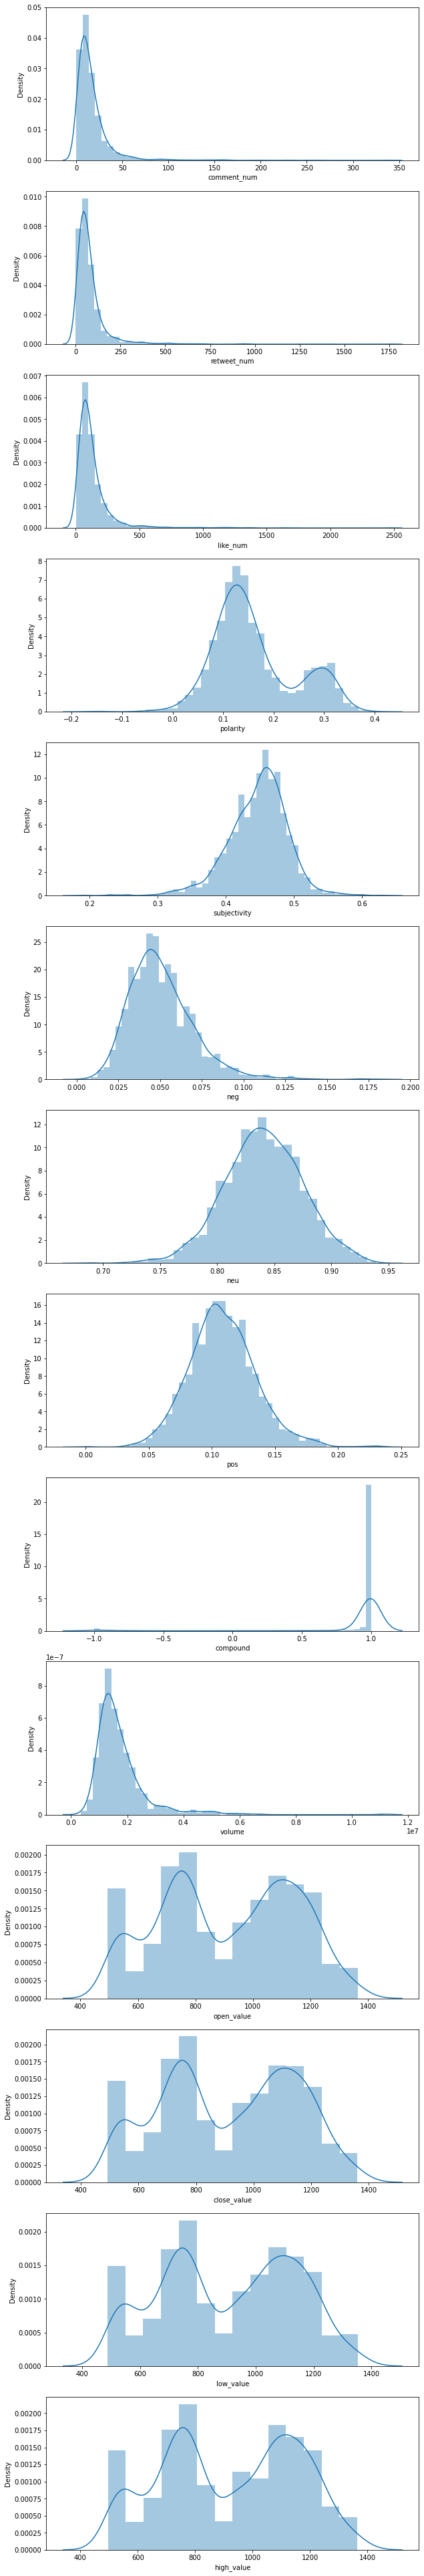

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(goog_sm_ts_same[col_int].columns):
    sns.distplot(goog_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

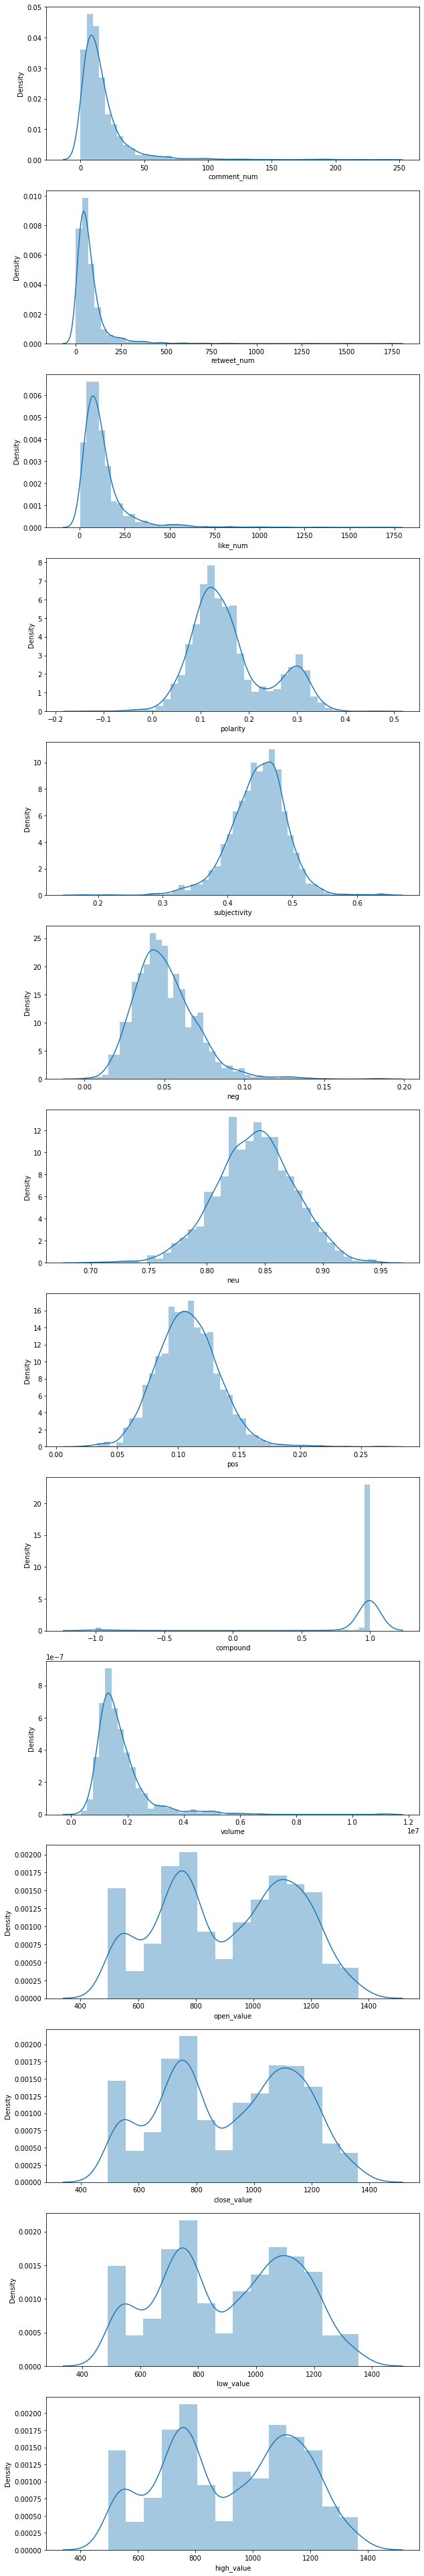

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(goog_sm_ts_prev[col_int].columns):
    sns.distplot(goog_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

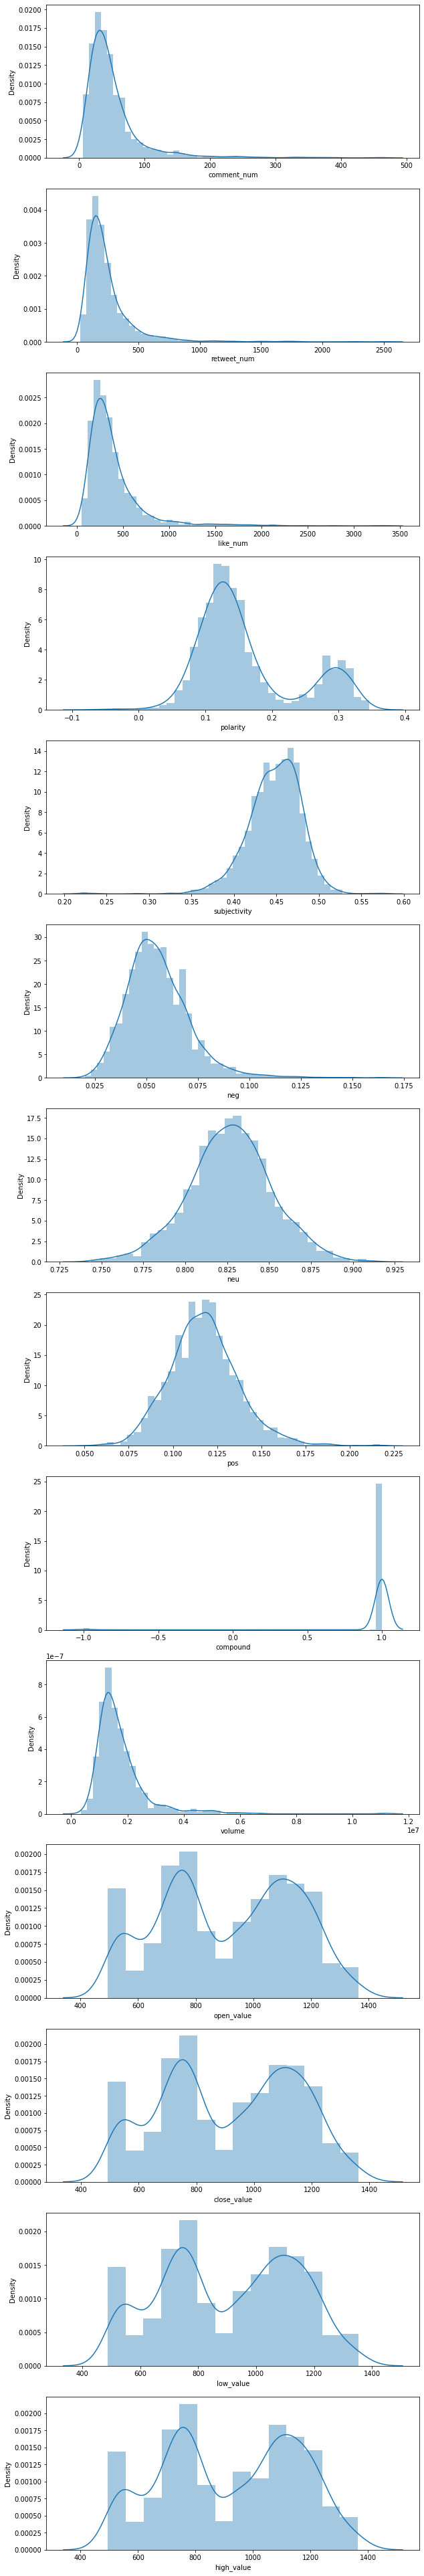

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(goog_sm_ts_3d[col_int].columns):
    sns.distplot(goog_sm_ts_3d[col_int][column],ax=axes[i])

### **Exporting the combined datasets**

In [ ]:
# same day
goog_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/goog_sm_ts_same.csv',index=False)

# previous day
goog_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/goog_sm_ts_prev.csv',index=False)

# last 3 days
goog_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Goog/goog_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = goog_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

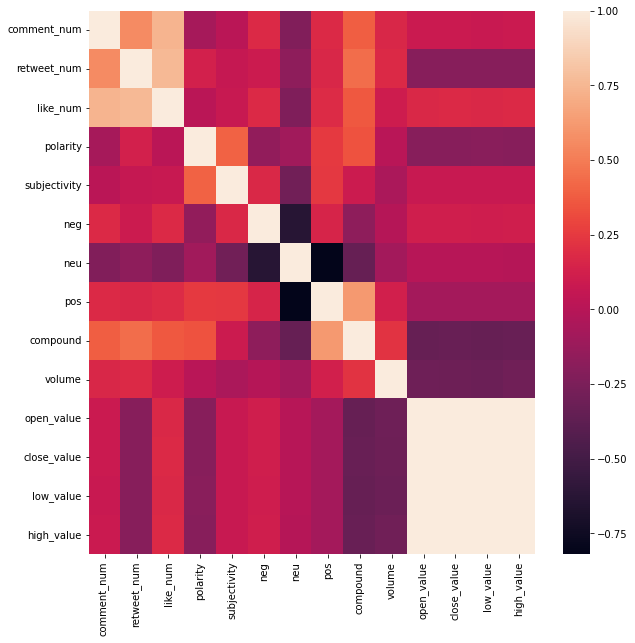

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(goog_sm_ts_same.corr(method='spearman'))

In [ ]:
display(calc_pvalues(goog_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...      0.0003    0.0007     0.0001
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity          0.0017           0   0.5587  ...           0         0          0
subjectivity      0.4716      0.0089   0.0014  ...      0.0018     0.002     0.0021
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...      0.9595    0.9816     0.8869
pos                    0           0        0  ...      0.0012     0.001     0.0016
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value        0.0004           0        0  ...           0         0          0
close_value       0.0003           0        0  ...           0         0          0
low_value         0.0007           0        0  ...           0         0          0
high_value        0.0001           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = goog_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

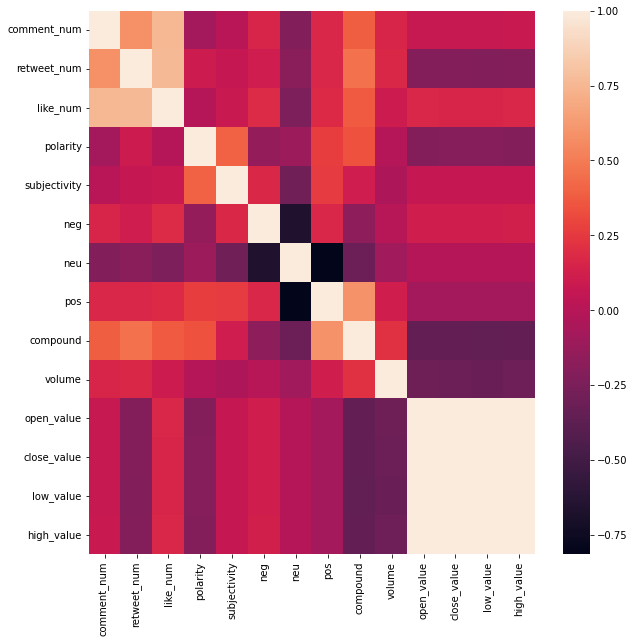

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(goog_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(goog_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...      0.0016    0.0024     0.0007
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity          0.0007           0    0.678  ...           0         0          0
subjectivity      0.5638      0.0058   0.0008  ...      0.0054    0.0051      0.006
neg                    0           0        0  ...           0         0          0
neu                    0           0        0  ...      0.8133    0.8535     0.7339
pos                    0           0        0  ...      0.0013    0.0011     0.0017
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value        0.0013           0        0  ...           0         0          0
close_value       0.0016           0        0  ...           0         0          0
low_value         0.0024           0        0  ...           0         0          0
high_value        0.0007           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = goog_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

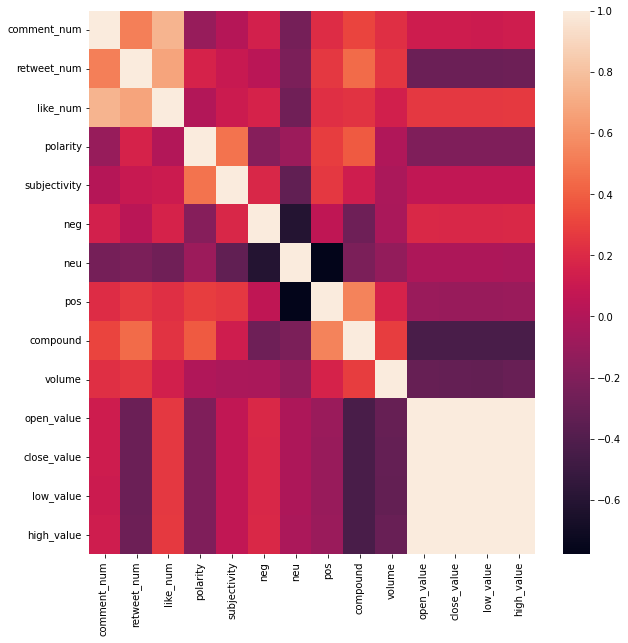

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(goog_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(goog_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity               0           0   0.9952  ...           0         0          0
subjectivity      0.4832           0        0  ...      0.0053    0.0054     0.0056
neg                    0       0.137        0  ...           0         0          0
neu                    0           0        0  ...       0.474     0.497     0.3658
pos                    0           0        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

##**For Googl**

In [ ]:
# filtering the dataset to get the stock market data of googl (GOOGL)

googl_sm = company_stock_data[company_stock_data['ticker_symbol']=='GOOGL']

# sorting the data and reseting the index
googl_sm = googl_sm.sort_values(by='day_date')
googl_sm.reset_index(drop=True,inplace=True)

display(googl_sm)

ticker_symbol    day_date  close_value  ...  open_value  high_value  low_value
0            GOOGL  2010-06-01     243.6667  ...    242.6868    248.0565   242.5302
1            GOOGL  2010-06-02     249.2233  ...    245.8439    249.4759   243.2071
2            GOOGL  2010-06-03     255.4013  ...    250.1023    256.6136   249.8952
3            GOOGL  2010-06-04     251.9259  ...    252.4310    257.2450   250.9055
4            GOOGL  2010-06-07     245.2580  ...    252.0976    253.0321   244.0608
...            ...         ...          ...  ...         ...         ...        ...
3080         GOOGL  2020-05-22    1413.2400  ...   1403.9000   1417.0000  1395.9500
3081         GOOGL  2020-05-26    1421.3700  ...   1441.9600   1445.1100  1419.3950
3082         GOOGL  2020-05-27    1420.2800  ...   1420.0000   1425.3450  1394.6000
3083         GOOGL  2020-05-28    1418.2400  ...   1400.0000   1444.4600  1399.0760
3084         GOOGL  2020-05-29    1433.5200  ...   1420.4300   1436.7300  1415.9800

[3085 rows x 7 columns]

In [ ]:
# checking info of the dataset
googl_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  3085 non-null   object 
 1   day_date       3085 non-null   object 
 2   close_value    3085 non-null   float64
 3   volume         3085 non-null   int64  
 4   open_value     3085 non-null   float64
 5   high_value     3085 non-null   float64
 6   low_value      3085 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 168.8+ KB


In [ ]:
# converting the 'day_date' column to datetime format
googl_sm['date'] = pd.to_datetime(googl_sm['day_date'])
googl_sm.drop(columns=['day_date'],inplace=True)
display(googl_sm)
print(googl_sm.info())

ticker_symbol  close_value   volume  ...  high_value  low_value       date
0            GOOGL     243.6667  2664303  ...    248.0565   242.5302 2010-06-01
1            GOOGL     249.2233  2513109  ...    249.4759   243.2071 2010-06-02
2            GOOGL     255.4013  3646724  ...    256.6136   249.8952 2010-06-03
3            GOOGL     251.9259  3909809  ...    257.2450   250.9055 2010-06-04
4            GOOGL     245.2580  3628970  ...    253.0321   244.0608 2010-06-07
...            ...          ...      ...  ...         ...        ...        ...
3080         GOOGL    1413.2400  1427206  ...   1417.0000  1395.9500 2020-05-22
3081         GOOGL    1421.3700  2229488  ...   1445.1100  1419.3950 2020-05-26
3082         GOOGL    1420.2800  1584185  ...   1425.3450  1394.6000 2020-05-27
3083         GOOGL    1418.2400  1759787  ...   1444.4600  1399.0760 2020-05-28
3084         GOOGL    1433.5200  1852522  ...   1436.7300  1415.9800 2020-05-29

[3085 rows x 7 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  3085 non-null   object        
 1   close_value    3085 non-null   float64       
 2   volume         3085 non-null   int64         
 3   open_value     3085 non-null   float64       
 4   high_value     3085 non-null   float64       
 5   low_value      3085 non-null   float64       
 6   date           3085 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 168.8+ KB
None


### **We are interested in data for the following dates:** 
(1) 2015-01-01 to 2020-01-01 for Same Day Tweets and Previous Day Tweets

(2) 2015-01-03 to 2020-01-01 for Last 3 Days Tweets ( because of last 3 days' aggregated tweets)

(2) 2015-01-07 to 2020-01-01 for Last 7 Day Tweets ( because of last 7 days' aggregated tweets)

In [ ]:
# preparing dataframe for same day tweets and previous day tweets
googl_sm_same = googl_sm.loc[(googl_sm['date']>="2015-01-01") & (googl_sm['date']<="2020-01-01")]

# viewing the dataset
display(googl_sm_same)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1156         GOOGL       530.66  1235889  ...    538.4000    530.200 2015-01-01
1157         GOOGL       529.55  1325271  ...    535.8000    527.880 2015-01-02
1158         GOOGL       529.55  1325271  ...    535.8000    527.880 2015-01-03
1159         GOOGL       529.55  1325271  ...    535.8000    527.880 2015-01-04
1160         GOOGL       519.46  2054120  ...    527.9899    517.750 2015-01-05
...            ...          ...      ...  ...         ...        ...        ...
2977         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-27
2978         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-28
2979         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-29
2980         GOOGL      1339.71  1000592  ...   1357.0000   1337.835 2019-12-30
2981         GOOGL      1339.39   976061  ...   1340.6600   1332.130 2019-12-31

[1826 rows x 7 columns]

In [ ]:
# preparing dataframe for last 3 days
googl_sm_3d = googl_sm.loc[(googl_sm['date']>="2015-01-03") & (googl_sm['date']<="2020-01-01")]

# viewing the dataset
display(googl_sm_3d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1158         GOOGL       529.55  1325271  ...    535.8000    527.880 2015-01-03
1159         GOOGL       529.55  1325271  ...    535.8000    527.880 2015-01-04
1160         GOOGL       519.46  2054120  ...    527.9899    517.750 2015-01-05
1161         GOOGL       506.64  2727897  ...    521.2100    505.550 2015-01-06
1162         GOOGL       505.15  2345062  ...    511.4900    503.650 2015-01-07
...            ...          ...      ...  ...         ...        ...        ...
2977         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-27
2978         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-28
2979         GOOGL      1354.64  1160873  ...   1367.0700   1353.000 2019-12-29
2980         GOOGL      1339.71  1000592  ...   1357.0000   1337.835 2019-12-30
2981         GOOGL      1339.39   976061  ...   1340.6600   1332.130 2019-12-31

[1824 rows x 7 columns]

In [ ]:
# preparing dataframe for last 7 days
googl_sm_7d = googl_sm.loc[(googl_sm['date']>="2015-01-07") & (googl_sm['date']<="2020-01-01")]

# viewing the dataset
display(googl_sm_7d)

ticker_symbol  close_value   volume  ...  high_value  low_value       date
1162         GOOGL       505.15  2345062  ...      511.49    503.650 2015-01-07
1163         GOOGL       506.91  3661816  ...      507.50    495.020 2015-01-08
1164         GOOGL       500.72  2097137  ...      508.60    498.650 2015-01-09
1165         GOOGL       500.72  2097137  ...      508.60    498.650 2015-01-10
1166         GOOGL       500.72  2097137  ...      508.60    498.650 2015-01-11
...            ...          ...      ...  ...         ...        ...        ...
2977         GOOGL      1354.64  1160873  ...     1367.07   1353.000 2019-12-27
2978         GOOGL      1354.64  1160873  ...     1367.07   1353.000 2019-12-28
2979         GOOGL      1354.64  1160873  ...     1367.07   1353.000 2019-12-29
2980         GOOGL      1339.71  1000592  ...     1357.00   1337.835 2019-12-30
2981         GOOGL      1339.39   976061  ...     1340.66   1332.130 2019-12-31

[1820 rows x 7 columns]

### **Importing the prepared tweets and sentiment dataframe and merging them with the suitable stock dataframe**

In [ ]:
# importing the tweets and sentiment dataframes
googl_tweets_same = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/comb_tweets_googl1_snt.csv')
googl_tweets_same = googl_tweets_same.drop(columns=['Unnamed: 0'])
googl_tweets_same.rename(columns={"updated_dates": "date"},inplace=True)
googl_tweets_same['date'] = pd.to_datetime(googl_tweets_same['date'])

googl_tweets_prev = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/comb_tweets_googlprev_snt.csv')
googl_tweets_prev = googl_tweets_prev.drop(columns=['Unnamed: 0'])
googl_tweets_prev.rename(columns={"updated_dates": "date"},inplace=True)
googl_tweets_prev['date'] = pd.to_datetime(googl_tweets_prev['date'])

googl_tweets_3d = pd.read_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/comb_tweets_googl3d_snt.csv')
googl_tweets_3d = googl_tweets_3d.drop(columns=['Unnamed: 0'])
googl_tweets_3d.rename(columns={"updated_dates": "date"},inplace=True)
googl_tweets_3d['date'] = pd.to_datetime(googl_tweets_3d['date'])

# viewing the dataframes
display(googl_tweets_same)
display(googl_tweets_prev)
display(googl_tweets_3d)

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-01  ...  positive
1    2015-01-02  ...  positive
2    2015-01-03  ...  positive
3    2015-01-04  ...  positive
4    2015-01-05  ...  positive
...         ...  ...       ...
1822 2019-12-28  ...  positive
1823 2019-12-29  ...  positive
1824 2019-12-30  ...  positive
1825 2019-12-31  ...  positive
1826 2020-01-01  ...  positive

[1827 rows x 13 columns]

date  ... sentiment
0    2015-01-03  ...  positive
1    2015-01-04  ...  positive
2    2015-01-05  ...  positive
3    2015-01-06  ...  positive
4    2015-01-07  ...  positive
...         ...  ...       ...
1820 2019-12-28  ...  positive
1821 2019-12-29  ...  positive
1822 2019-12-30  ...  positive
1823 2019-12-31  ...  positive
1824 2020-01-01  ...  positive

[1825 rows x 13 columns]

**Combining Stock, tweets and sentiment for same day**

In [ ]:
# merging the dataframes
googl_sm_ts_same = pd.merge(googl_sm_same,googl_tweets_same,how='left', on='date') 

# viewing the first and last five rows
display(googl_sm_ts_same)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0            GOOGL       530.66  1235889  ...  0.186    0.9972   positive
1            GOOGL       529.55  1325271  ...  0.104    0.9940   positive
2            GOOGL       529.55  1325271  ...  0.231    0.9999   positive
3            GOOGL       529.55  1325271  ...  0.250    0.9999   positive
4            GOOGL       519.46  2054120  ...  0.182    0.9999   positive
...            ...          ...      ...  ...    ...       ...        ...
1821         GOOGL      1354.64  1160873  ...  0.170    0.9999   positive
1822         GOOGL      1354.64  1160873  ...  0.125    0.9967   positive
1823         GOOGL      1354.64  1160873  ...  0.131    0.9967   positive
1824         GOOGL      1339.71  1000592  ...  0.156    0.9998   positive
1825         GOOGL      1339.39   976061  ...  0.097    0.9992   positive

[1826 rows x 19 columns]

In [ ]:
# rearranging the columns of the final dataframes and dropping unnecessary columns

# viewing all existing columns
display(googl_sm_ts_same.columns)

Index(['ticker_symbol', 'close_value', 'volume', 'open_value', 'high_value',
       'low_value', 'date', 'body', 'comment_num', 'retweet_num', 'like_num',
       'clean_text', 'polarity', 'subjectivity', 'neg', 'neu', 'pos',
       'compound', 'sentiment'],
      dtype='object')

In [ ]:
# we want to remove 'body' column
googl_sm_ts_same.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
col_names = ['date','ticker_symbol','clean_text','comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound','sentiment','volume','open_value','close_value','low_value','high_value']
googl_sm_ts_same = googl_sm_ts_same.reindex(columns=col_names)
print('columns after rearranging:\n',googl_sm_ts_same.columns)
display(googl_sm_ts_same)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01         GOOGL  ...   530.200    538.4000
1    2015-01-02         GOOGL  ...   527.880    535.8000
2    2015-01-03         GOOGL  ...   527.880    535.8000
3    2015-01-04         GOOGL  ...   527.880    535.8000
4    2015-01-05         GOOGL  ...   517.750    527.9899
...         ...           ...  ...       ...         ...
1821 2019-12-27         GOOGL  ...  1353.000   1367.0700
1822 2019-12-28         GOOGL  ...  1353.000   1367.0700
1823 2019-12-29         GOOGL  ...  1353.000   1367.0700
1824 2019-12-30         GOOGL  ...  1337.835   1357.0000
1825 2019-12-31         GOOGL  ...  1332.130   1340.6600

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for previous day**

In [ ]:
# merging the dataframes
googl_sm_ts_prev = pd.merge(googl_sm_same,googl_tweets_prev,how='left', on='date') 

# viewing the merged dataframe
display(googl_sm_ts_prev)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0            GOOGL       530.66  1235889  ...  0.099    0.7269   positive
1            GOOGL       529.55  1325271  ...  0.196    0.9986   positive
2            GOOGL       529.55  1325271  ...  0.169    0.9995   positive
3            GOOGL       529.55  1325271  ...  0.253    0.9999   positive
4            GOOGL       519.46  2054120  ...  0.236    0.9999   positive
...            ...          ...      ...  ...    ...       ...        ...
1821         GOOGL      1354.64  1160873  ...  0.137    0.9998   positive
1822         GOOGL      1354.64  1160873  ...  0.152    0.9999   positive
1823         GOOGL      1354.64  1160873  ...  0.173    0.9985   positive
1824         GOOGL      1339.71  1000592  ...  0.132    0.9977   positive
1825         GOOGL      1339.39   976061  ...  0.154    0.9998   positive

[1826 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
googl_sm_ts_prev.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
googl_sm_ts_prev = googl_sm_ts_prev.reindex(columns=col_names)
print('columns after rearranging:\n',googl_sm_ts_prev.columns)
display(googl_sm_ts_prev)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-01         GOOGL  ...   530.200    538.4000
1    2015-01-02         GOOGL  ...   527.880    535.8000
2    2015-01-03         GOOGL  ...   527.880    535.8000
3    2015-01-04         GOOGL  ...   527.880    535.8000
4    2015-01-05         GOOGL  ...   517.750    527.9899
...         ...           ...  ...       ...         ...
1821 2019-12-27         GOOGL  ...  1353.000   1367.0700
1822 2019-12-28         GOOGL  ...  1353.000   1367.0700
1823 2019-12-29         GOOGL  ...  1353.000   1367.0700
1824 2019-12-30         GOOGL  ...  1337.835   1357.0000
1825 2019-12-31         GOOGL  ...  1332.130   1340.6600

[1826 rows x 18 columns]

**Combining Stock, tweets and sentiment for last 3 days**

In [ ]:
# merging the dataframes
googl_sm_ts_3d = pd.merge(googl_sm_3d,googl_tweets_3d,how='left', on='date') 

# viewing the merged dataframes
display(googl_sm_ts_3d)

ticker_symbol  close_value   volume  ...    pos  compound  sentiment
0            GOOGL       529.55  1325271  ...  0.148    0.9998   positive
1            GOOGL       529.55  1325271  ...  0.155    0.9999   positive
2            GOOGL       519.46  2054120  ...  0.249    1.0000   positive
3            GOOGL       506.64  2727897  ...  0.263    1.0000   positive
4            GOOGL       505.15  2345062  ...  0.249    1.0000   positive
...            ...          ...      ...  ...    ...       ...        ...
1819         GOOGL      1354.64  1160873  ...  0.160    1.0000   positive
1820         GOOGL      1354.64  1160873  ...  0.153    1.0000   positive
1821         GOOGL      1354.64  1160873  ...  0.163    1.0000   positive
1822         GOOGL      1339.71  1000592  ...  0.165    0.9999   positive
1823         GOOGL      1339.39   976061  ...  0.136    1.0000   positive

[1824 rows x 19 columns]

In [ ]:
# we want to remove 'body' column
googl_sm_ts_3d.drop(columns=['body'],inplace=True)

In [ ]:
# we will rearrange as follows
googl_sm_ts_3d = googl_sm_ts_3d.reindex(columns=col_names)
print('columns after rearranging:\n',googl_sm_ts_3d.columns)
display(googl_sm_ts_3d)

columns after rearranging:
 Index(['date', 'ticker_symbol', 'clean_text', 'comment_num', 'retweet_num',
       'like_num', 'polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound',
       'sentiment', 'volume', 'open_value', 'close_value', 'low_value',
       'high_value'],
      dtype='object')


date ticker_symbol  ... low_value  high_value
0    2015-01-03         GOOGL  ...   527.880    535.8000
1    2015-01-04         GOOGL  ...   527.880    535.8000
2    2015-01-05         GOOGL  ...   517.750    527.9899
3    2015-01-06         GOOGL  ...   505.550    521.2100
4    2015-01-07         GOOGL  ...   503.650    511.4900
...         ...           ...  ...       ...         ...
1819 2019-12-27         GOOGL  ...  1353.000   1367.0700
1820 2019-12-28         GOOGL  ...  1353.000   1367.0700
1821 2019-12-29         GOOGL  ...  1353.000   1367.0700
1822 2019-12-30         GOOGL  ...  1337.835   1357.0000
1823 2019-12-31         GOOGL  ...  1332.130   1340.6600

[1824 rows x 18 columns]

**Plotting distribution plot of all the merged dataframes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

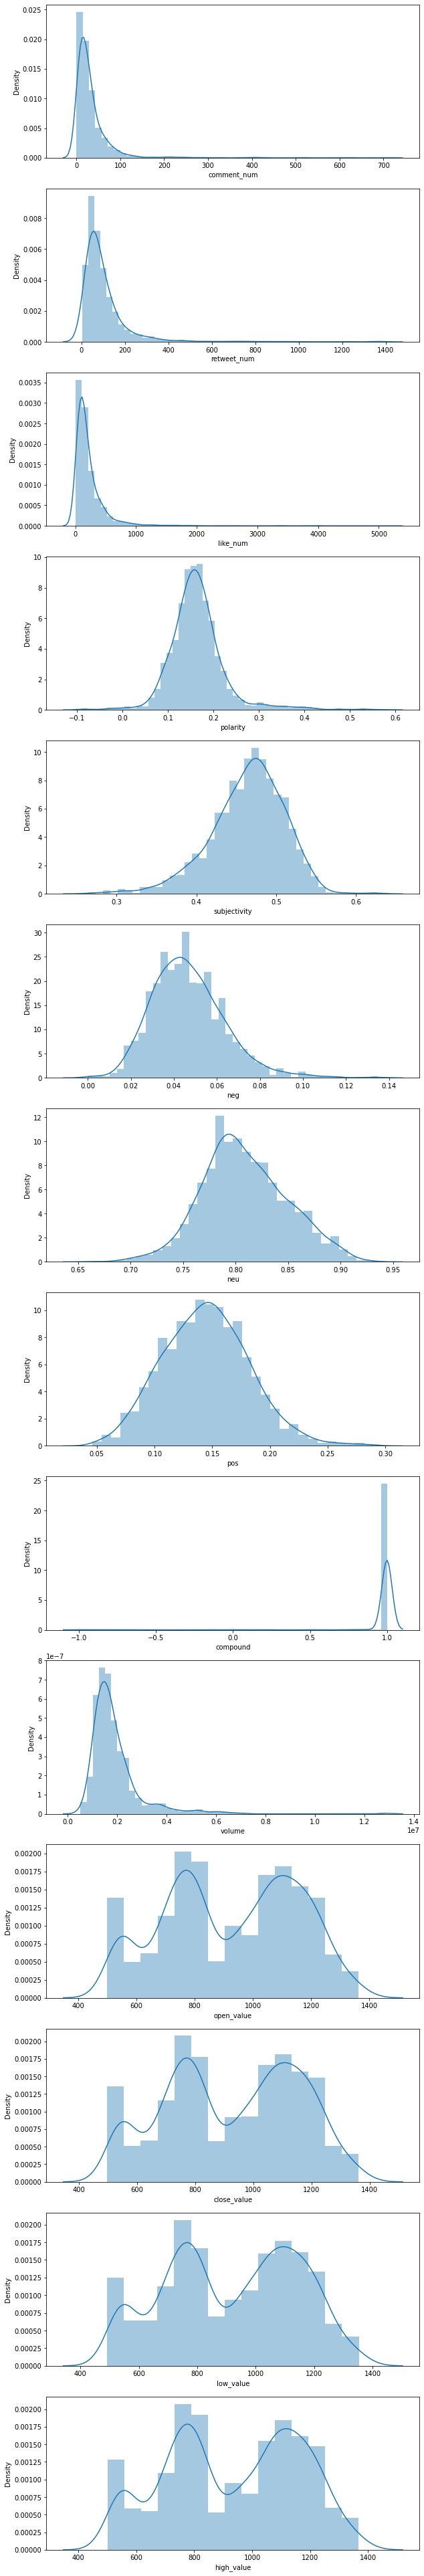

In [ ]:
# Defining the columns of interest
col_int = ['comment_num','retweet_num','like_num','polarity','subjectivity','neg','neu','pos','compound', 'volume','open_value','close_value','low_value','high_value']

# defining the number of rows and columns for subplots
n_rows=len(col_int)
n_cols=1

# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(googl_sm_ts_same[col_int].columns):
    sns.distplot(googl_sm_ts_same[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

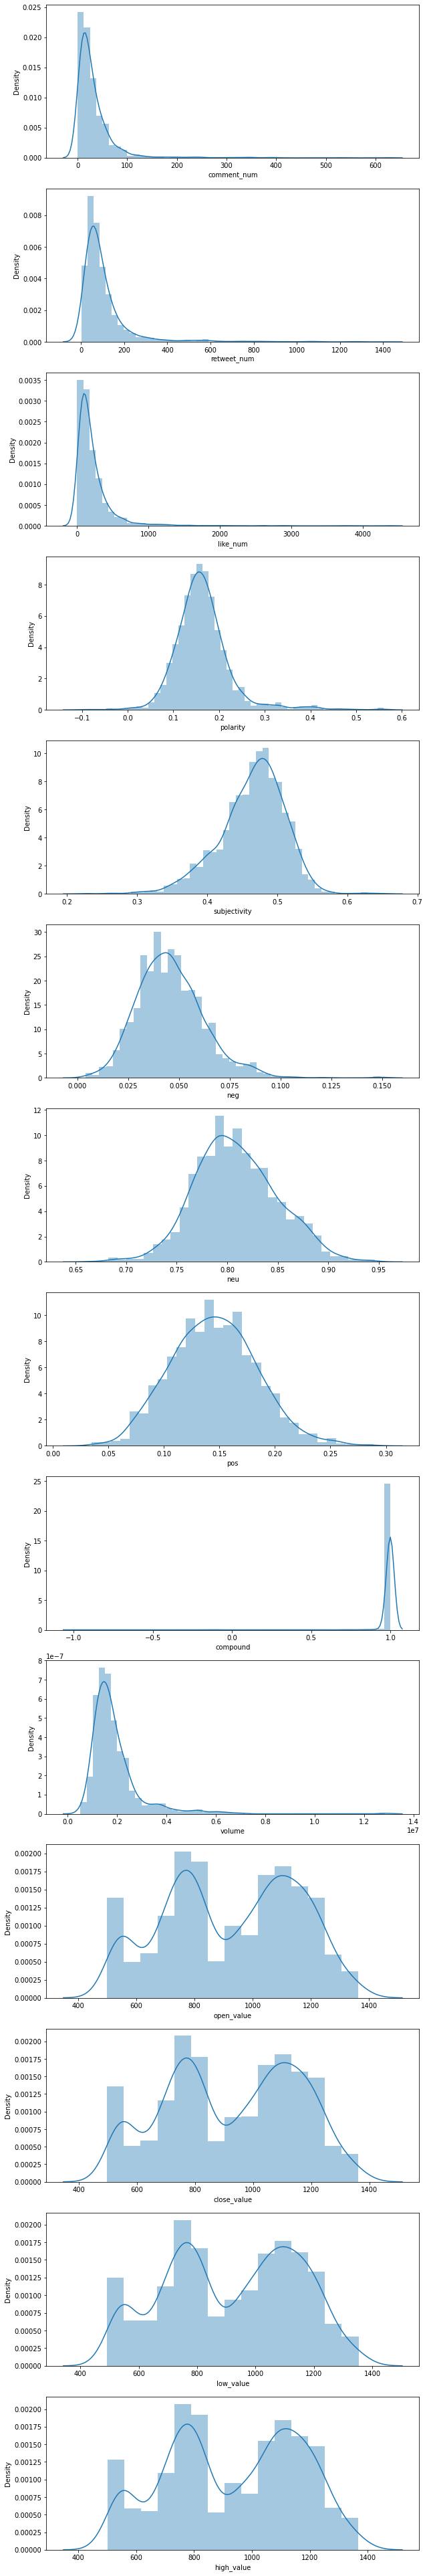

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(googl_sm_ts_prev[col_int].columns):
    sns.distplot(googl_sm_ts_prev[col_int][column],ax=axes[i])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

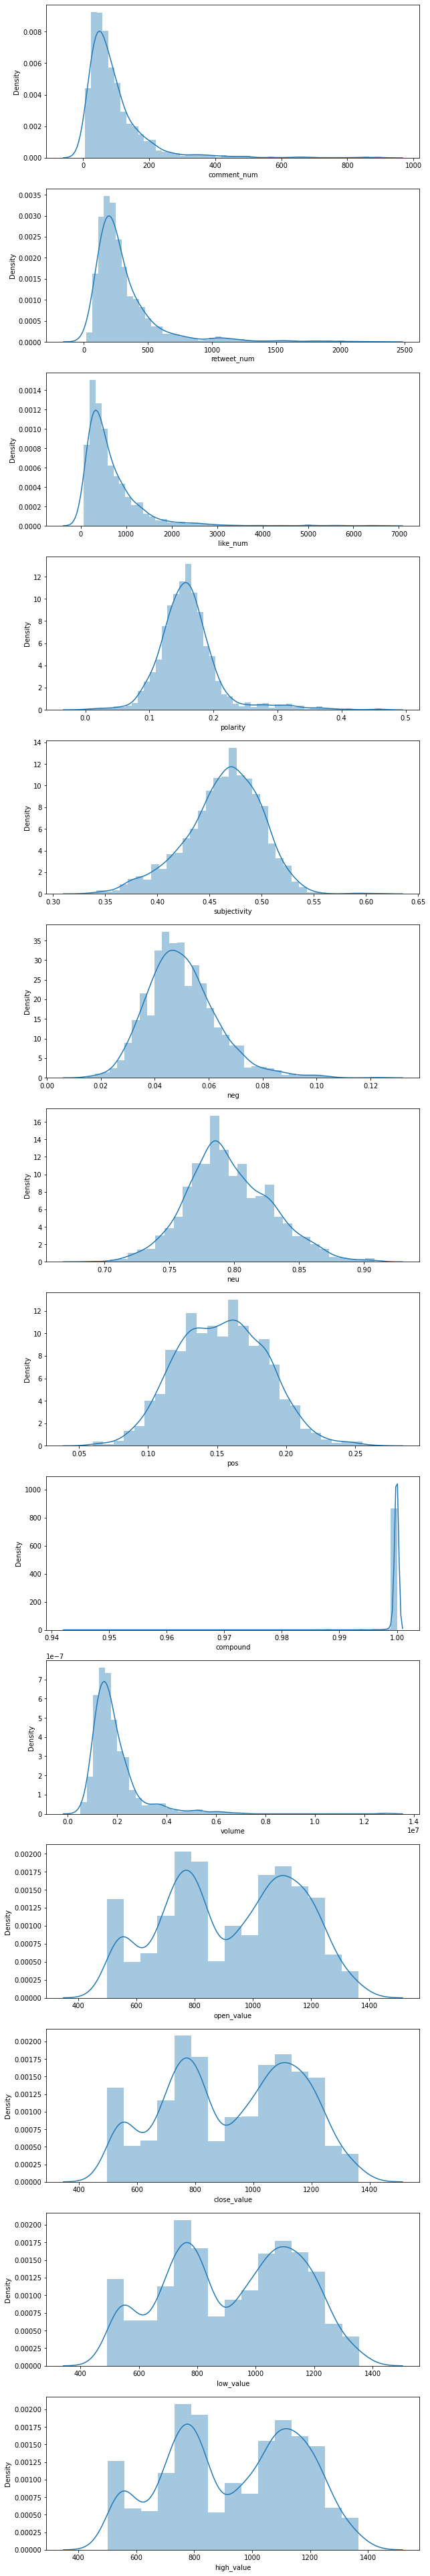

In [ ]:
# Creating the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(10,70))

for i, column in enumerate(googl_sm_ts_3d[col_int].columns):
    sns.distplot(googl_sm_ts_3d[col_int][column],ax=axes[i])

### **Exporting the combined datasets**

In [ ]:
# same day
googl_sm_ts_same.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/googl_sm_ts_same.csv',index=False)

# previous day
googl_sm_ts_prev.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/googl_sm_ts_prev.csv',index=False)

# last 3 days
googl_sm_ts_3d.to_csv('/content/gdrive/MyDrive/DATA_602_Project/datasets/Googl/googl_sm_ts_3d.csv',index=False)

### **Finding spearman correlation values and p-values and plotting correlation plot**

#### **Same Day**

In [ ]:
corr = googl_sm_ts_same.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

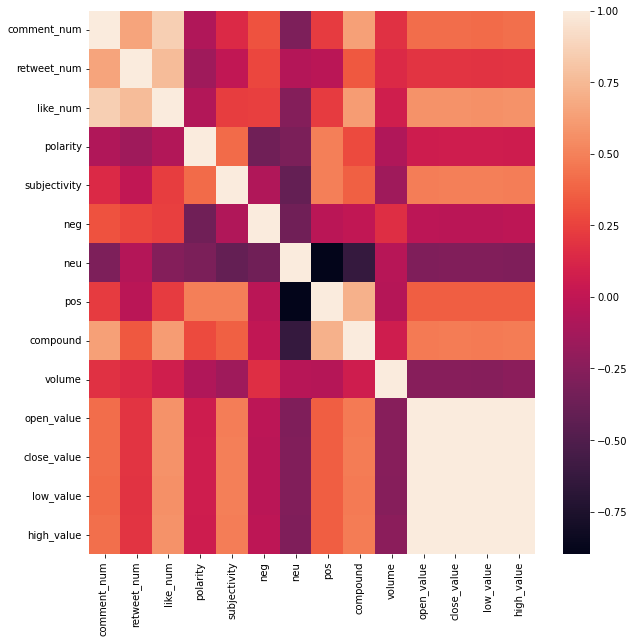

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(googl_sm_ts_same.corr(method='spearman'))

In [ ]:
display(calc_pvalues(googl_sm_ts_same))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity          0.0021           0   0.0064  ...      0.0033    0.0025     0.0069
subjectivity           0      0.9171        0  ...           0         0          0
neg                    0           0        0  ...      0.3092     0.259     0.5175
neu                    0        0.01        0  ...           0         0          0
pos                    0      0.2486        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0   0.0013  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Previous Day

In [ ]:
corr = googl_sm_ts_prev.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

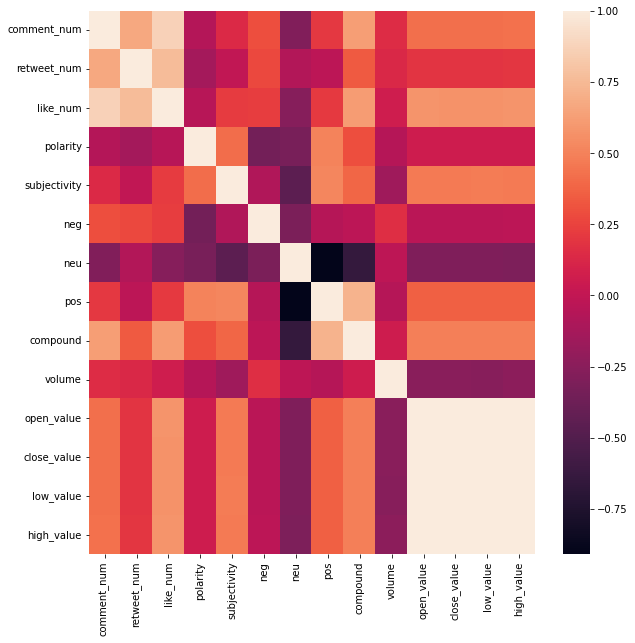

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(googl_sm_ts_prev.corr(method='spearman'))

In [ ]:
display(calc_pvalues(googl_sm_ts_prev))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity          0.0064           0   0.0412  ...      0.0164    0.0124     0.0228
subjectivity           0      0.8793        0  ...           0         0          0
neg                    0           0        0  ...      0.1489    0.1275     0.2369
neu                    0      0.0042        0  ...           0         0          0
pos                    0      0.2925        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0   0.0045  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]

#### Last 3 Days

In [ ]:
corr = googl_sm_ts_3d.corr(method='spearman')

corr.style.background_gradient(cmap='coolwarm')

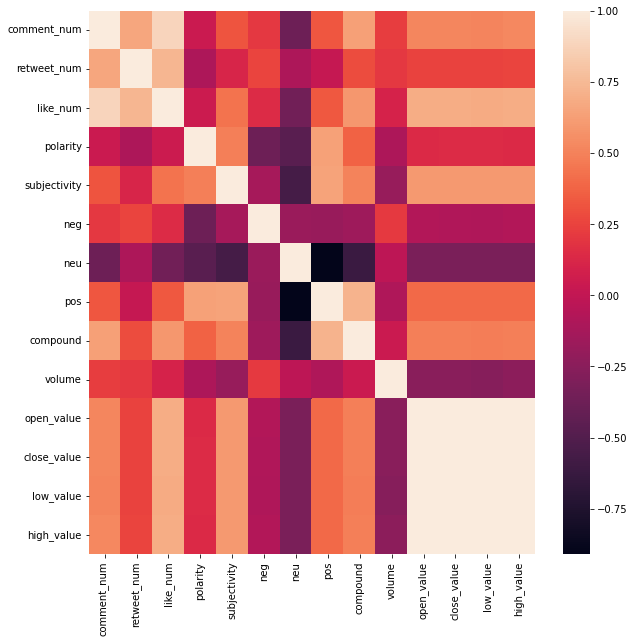

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(googl_sm_ts_3d.corr(method='spearman'))

In [ ]:
display(calc_pvalues(googl_sm_ts_3d))

comment_num retweet_num like_num  ... close_value low_value high_value
comment_num            0           0        0  ...           0         0          0
retweet_num            0           0        0  ...           0         0          0
like_num               0           0        0  ...           0         0          0
polarity          0.1085           0   0.0307  ...           0         0          0
subjectivity           0           0        0  ...           0         0          0
neg                    0           0        0  ...      0.0006    0.0004     0.0022
neu                    0           0        0  ...           0         0          0
pos                    0      0.3843        0  ...           0         0          0
compound               0           0        0  ...           0         0          0
volume                 0           0        0  ...           0         0          0
open_value             0           0        0  ...           0         0          0
close_value            0           0        0  ...           0         0          0
low_value              0           0        0  ...           0         0          0
high_value             0           0        0  ...           0         0          0

[14 rows x 14 columns]